# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) Capstone Part 1: Dataset + Data Collection

## 💡 Problem Statement

As an all-things-science enjoyer and a Neuroscience postgraduate, I love staying up to date with recent scientific discoveries. In doing so, I've noticed that catchy headlines about “breakthroughs” and “successes” often contradict the information in the original article, as the media oversensionalises scientific disoveries to generate clicks and views. This effect is further amplified with the unstoppable machine of social media. 

A recent example of this phenomenon comes from the twitter user TheDebbieMia, who [exclaimed](https://twitter.com/TheDebbieMia/status/1524867531319787523) “THEY FOUND THE CAUSE OF SIDS” [Sudden Infant Death Syndrome], accumulating almost 279.3k likes and 66.7k retweets at the time of writing. 

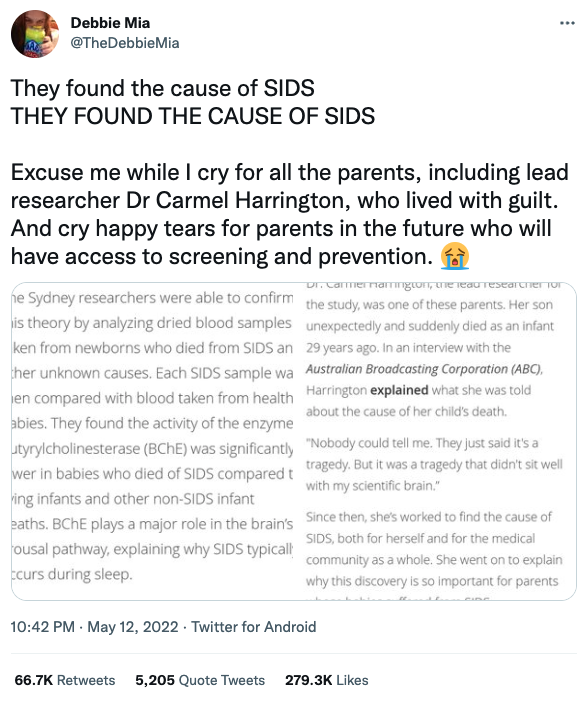

Here is the catch — in an interview to [The Scientist](https://www.the-scientist.com/news-opinion/did-researchers-really-uncover-the-cause-of-sids-70031), the study leader and SIDS researcher Carmel Harrington expressed their surprise at the media coverage of their work, clarifying that “a biomarker does not equal cause and what we have found is a potential biomarker and not a cause.” While Harrington’s research was an indicator of progress in the field, it was in no way what the media claimed it to be. They further followed that “in science the message is nuanced and it is easy for non-scientific people to misinterpret scientific language.” On this occasion, the cost of misinformation was false hope, which was diffused as fast as it blew up.

Conversely, a dangerous example of scientific misinformation is the infamous Wakefield’s study (1998), which wrongly implied a link between the measles, mumps and rubella (MMR) vaccination and autism. While the scientific community widely discredited the researcher for falsified research and “[callous disregard](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2831678/)” for the participants, the original article was a bombshell in the media, which turned tens of thousands of parents around the world against vaccinating their children to a [statistically significant degree](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0256395). The ripple effect of this 20+ year old article is noticeably present in our world today, with so-called anti-vax movements still very much alive, thriving and endangering the public health through [preventable measles outbreaks](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5489284/) and  [COVID-19 vaccination hesitancy](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0264019).  

My last example is the Elon Musk effect. The overglorified entrepreneur’s passion project Neuralink (a brain-computer-interface) was claimed to be an implant that will “[save memories like photos](https://fortune.com/2022/02/22/elon-musk-neuralink-brain-implant-claims/)”, cure brain disorders and help paraplegics walk again. While this ascertained Musk’s place as a humanity-saving visionary to his faithful Twitter flock, these claims are undeniably closer to science fiction than they are to real neuroscience. As such, [15 of 23 monkeys died](https://fortune.com/2022/02/15/musk-brain-chip-company-neuralink-admits-to-killing-8-monkeys-in-experiments/) in mostly unsuccessful Neuralink trials, while Musk continues to receive widespread [critisism](https://www.inverse.com/science/neuralink-bad-sci-fi) from  [pioneers](https://www.nicolelislab.net/) in brain-computer interfaces for lacking innovation, plagiarising and making false promises.

**All three of my examples have one thing in common — a monstrous disparity between the  “impact” that a scientific claim has on the media and the general public, and the genuine “value” it brings to the scientific research. Within this project, I use machine learning to uncover what features of a given neuroscience-related article most contribute to its impact and value, whether the two are related and could be predicted.**

## Project Goal

Within this project, I aim to uncover the article features that most contribute to the attention a given article receives by the scientific community vs the general public. The specific questions I aim to answer are:

1. Which factors contribute most to the *value* of an article to the scientific community?
    - **Target**: value factor measured as article reference counts within further academic work in publilshed academic journals
2. Which factors contribute most to the *impact* of an article on the general public?
    - **Target**: impact factor measured as mention counts on social media, news outlets, and other non-academic sources,
3. Are these factors correlated? If not, which features hold the biggest disparities between the scientific and general communities?

## Importing the necessary packages

In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import requests

plt.style.use('ggplot')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
import pprint
pp = pprint.PrettyPrinter(indent=4)

# 📌 Inspecting the Springer API Data & Writing Useful Functions 

✏️ I collected most of my data from the <a href="https://dev.springernature.com/">Springer Nature API</a>, which is a leading global scientific publisher of books and journals. I have selected a range of journals available on the API, keeping in mind their <a href="https://www.scimagojr.com/journalrank.php?category=2801">Scimago</a> ratings in mind.

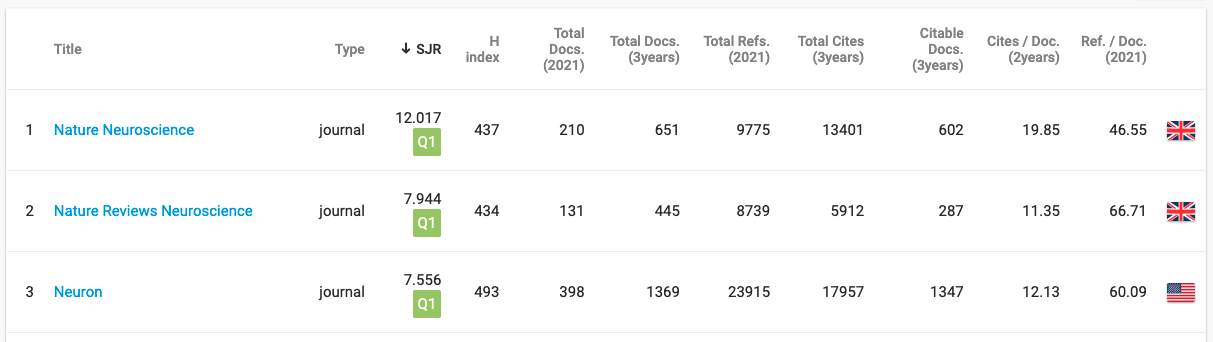

✏️ I started by defining the journals I desired to retreive from the Springer API.

In [3]:
### FRONTIERS 

frontiers_subsets = ["Aging Neuroscience",
                     "Behavioural Neuroscience",
                     "Molecular Neuroscience",
                     "Computational Neuroscience",
                     "Evolutionary Neuroscience",
                     "Integrative Neuroscience",
                     "Neuroinformatics",
                     "Neuroimaging",
                     "Synaptic Neuroscience",
                     "Systems Neuroscience",
                     "Neuroscience",
                     "Cellular Neuroscience",
                     "Neurology",
                     "Human Neuroscience"]

frontiers_journals = []

for subset in frontiers_subsets:
    frontiers_journals.append("Frontiers in "+ subset)
    
### OTHER JOURNALS
    
desired_journals = ["Nature Neuroscience", 
                    "The Lancet Neurology",
                    "Trends in Neurosciences",
                    "Journal of Neuroscience"]
    
desired_journals = frontiers_journals + desired_journals

In [4]:
print("I will be scraping", len(desired_journals), "journals, including:", desired_journals)

I will be scraping 18 journals, including: ['Frontiers in Aging Neuroscience', 'Frontiers in Behavioural Neuroscience', 'Frontiers in Molecular Neuroscience', 'Frontiers in Computational Neuroscience', 'Frontiers in Evolutionary Neuroscience', 'Frontiers in Integrative Neuroscience', 'Frontiers in Neuroinformatics', 'Frontiers in Neuroimaging', 'Frontiers in Synaptic Neuroscience', 'Frontiers in Systems Neuroscience', 'Frontiers in Neuroscience', 'Frontiers in Cellular Neuroscience', 'Frontiers in Neurology', 'Frontiers in Human Neuroscience', 'Nature Neuroscience', 'The Lancet Neurology', 'Trends in Neurosciences', 'Journal of Neuroscience']


## JSON Retreival Trial-Run

### Compiling lists for test request structures 

✏️ Here, I created a list of base URLs to use for my intial requests & JSON inspection.

In [5]:
my_basic_request_urls = []
my_springer_JSONs = []

for journal in desired_journals:
    my_basic_request_urls.append("http://api.springernature.com/meta/v2/json?q=(journal: %s)&api_key=0bb558adba4c4dc96965267d529e4da7" % journal)
    my_springer_JSONs.append(journal.lower().replace(" ", "_"))  

# print(my_basic_request_urls)
# print(my_springer_JSONs)

### Compiling test JSON objects & initial inspection

In [6]:
for i in range(len(desired_journals)):
    my_springer_JSONs[i] = requests.get(my_basic_request_urls[i])
    my_springer_JSONs[i] = my_springer_JSONs[i].json()
    
pp.pprint(my_springer_JSONs[0])

{   'apiKey': '0bb558adba4c4dc96965267d529e4da7',
    'apiMessage': 'This JSON was provided by Springer Nature',
    'facets': [   {   'name': 'subject',
                      'values': [   {'count': '98', 'value': 'Life Sciences'},
                                    {   'count': '56',
                                        'value': 'Biochemistry, general'},
                                    {'count': '56', 'value': 'Cell Biology'},
                                    {   'count': '56',
                                        'value': 'Developmental Biology'},
                                    {   'count': '56',
                                        'value': 'Genetics and Population '
                                                 'Dynamics'},
                                    {'count': '56', 'value': 'Neurobiology'},
                                    {'count': '56', 'value': 'Proteomics'},
                                    {   'count': '41',
                           

In [7]:
my_springer_JSONs[0]["result"][0]['total']

'195'

✏️ Using the links & request variables created above, I acquired a JSON structure for each journal with initial information. Through initial inspection, I noticed that only 10 results can be pulled at once, which I have verified to be the maximum available retreival quantity according to the API's documentation. 

### Printing results count for each journal request:

In [8]:
for i in range(len(my_springer_JSONs)):
    print(desired_journals[i], my_springer_JSONs[i]["result"][0]['total'])

Frontiers in Aging Neuroscience 195
Frontiers in Behavioural Neuroscience 186
Frontiers in Molecular Neuroscience 205
Frontiers in Computational Neuroscience 114
Frontiers in Evolutionary Neuroscience 107
Frontiers in Integrative Neuroscience 63
Frontiers in Neuroinformatics 8
Frontiers in Neuroimaging 48
Frontiers in Synaptic Neuroscience 102
Frontiers in Systems Neuroscience 391
Frontiers in Neuroscience 413
Frontiers in Cellular Neuroscience 177
Frontiers in Neurology 146
Frontiers in Human Neuroscience 321
Nature Neuroscience 50347
The Lancet Neurology 3096
Trends in Neurosciences 39
Journal of Neuroscience 92044


✏️ Some of these journals contain dozens of thousands of articles. I will therefore need to create a list of sub-links, which specify the results start pages adapted to each of the journal's result lengths. I'll tackle this after I examine the JSON structures & practice retreiving the data I need for my analysis. 

### JSON Variable Inspection

✏️ The data I am looking to retreive for my analysis is as follows:

    - doi 
    - title
    - year 
    - first author
    - other authors
    - institution
    - abstract
    - keywords
    - journal
    - publisher 
    - language 
    - article length
    - publication type
    - date published 
    - dates online & in print 
    - open access (yes/no)
    - impact factor / citation count

In [9]:
pp.pprint(my_springer_JSONs[0]['records'][0])

{   'abstract': 'Virtual Reality (VR) is becoming an increasingly important '
                'technology in a host of industries, including tourism. VR can '
                'provide virtual experiences before, during, or in lieu of '
                'real-world visits to tourism sites. Hence, providing '
                'authentic experiences is essential to satisfy guests with the '
                'site and technology. This study analyzes survey data using '
                'PLS to identify the determinants of satisfaction with '
                'non-immersive VR experiences of heritage and non-heritage '
                'tourism sites. Results from 193 subjects reveal the linkages '
                'between system quality, object-related authenticity, '
                'activity-related authenticity, and presence, as well their '
                'relationship with satisfaction.',
    'conferenceInfo': [],
    'contentType': 'Article',
    'copyright': '©2022 The Author(s), under e

✏️ **From observing the data, I can see that I can retreive the following variables:**

- ✅ doi: 'doi' 
- ✅ title: 'title' 
- ✅ date published: 'publicationDate' 
- ✅ abstract 'abstract'
- ✅ journal: 'publicationName'
- ✅ publisher: 'publisher' 
- ✅ language: 'language'
- ✅ dates online & in print: 'printDate' & 'onlineDate' 
- ✅ open access (yes/no): 'openaccess'
---
💡 *Note: the below need further unravelling*
- ✅ first author & other authors:'creators' 
- ✅ keywords: 'keyword'
- ✅ article length: 'endingPage' - 'startingPage' + 1 
- ✅ publication type: 'genre' / 'publicationType' / 'issueType' / 'contentType' 
---
💡 *Note: the below need to be gathered elsewhere*
- ☑️ institution
- ☑️ impact factor / citation count

### Retreiving the "easier" variables

✏️ I first retreived the more obvious structures from an example JSON.

In [11]:
records = my_springer_JSONs[0]['records']

doi_list = []
title_list = []
date_published_list = []
abstract_list = []
journal_list = []
publisher_list = []
language_list = []
date_online_list = []
date_print_list = []
is_open_access_list = []


for record_index in range(len(records)):
    
    try:
        doi_list.append(records[record_index]['doi'])
    except:
        doi_list.append(np.nan) 
        
    try:
        title_list.append(records[record_index]['title'])
    except:
        title_list.append(np.nan) 
    
    try: 
        date_published_list.append(records[record_index]['publicationDate'])
        
    except:
        date_published_list.append(np.nan)   
        
    try:
        abstract_list.append(records[record_index]['abstract'])
    except:
        abstract_list.append(np.nan)   
    
    try: 
        journal_list.append(records[record_index]['publicationName'])
    except:
        journal_list.append(np.nan)
    
    try:
        publisher_list.append(records[record_index]['publisher'])
    except:
        publisher_list.append(np.nan)
    
    try:
        language_list.append(records[record_index]['language'])
    except:
        language_list.append(np.nan)
        
    try:
        date_online_list.append(records[record_index]['onlineDate'])
    except:
        date_online_list.append(np.nan)
        
    try:
        date_print_list.append(records[record_index]['printDate'])
    except:
        date_print_list.append(np.nan)
    
    try:
        is_open_access_list.append(records[record_index]['openaccess'])
    except:
        is_open_access_list.append(np.nan)

In [15]:
# print(doi_list)
# print(title_list)
# print(date_published_list) 
# print(abstract_list) 
# print(journal_list) 
# print(publisher_list) 
# print(language_list) 
# print(date_online_list) 
# print(date_print_list) 
# print(is_open_access_list) 

### Unraveling the "trickier" variables

✏️ The above worked fine, so I moved on to the visually trickier parts of the JSON which needed further unravelling.

#### Exploring 'genre' / 'publicationType' / 'issueType' / 'contentType'

In [18]:
records = my_springer_JSONs[0]['records']

In [19]:
genre_list = []
publication_type_list = []
issue_type_list = []
content_type_list = []

for record_index in range(len(records)):

    try:
        genre_list.append(records[record_index]['genre'])
    except:
        genre_list.append(np.nan) 
        
    try:
        publication_type_list.append(records[record_index]['publicationType'])
    except:
        publication_type_list.append(np.nan) 
    
    try: 
        issue_type_list.append(records[record_index]['issueType']) 
    except:
        issue_type_list.append(np.nan) 
        
    try: 
        content_type_list.append(records[record_index]['contentType']) 
    except:
        content_type_list.append(np.nan)   

In [20]:
print(genre_list)

['OriginalPaper', 'OriginalPaper', ['OriginalPaper', 'Research Article'], 'OriginalPaper', ['ReviewPaper', 'Review Article'], 'OriginalPaper', ['ReviewPaper', 'Review Article'], 'OriginalPaper', ['OriginalPaper', 'Research Article'], ['ReviewPaper', 'Review']]


In [21]:
print(publication_type_list)

['Journal', 'Journal', 'Journal', 'Journal', 'Journal', 'Journal', 'Journal', 'Journal', 'Journal', 'Journal']


✏️  publication_type seems reduntant because all the publications I selected were journals... I won't include it

In [22]:
print(issue_type_list)

['', '', 'Regular', '', 'Regular', '', 'Regular', '', 'Regular', 'Regular']


In [23]:
print(content_type_list)

['Article', 'Article', 'Article', 'Article', 'Article', 'Article', 'Article', 'Article', 'Article', 'Article']


✏️ I'll keep issue & content types and add them to the retreival function as is. The genre list needs further unraveling:

In [35]:
genre_list = []
        
for record_index in range(len(records)):
    
    try:
        if type(records[record_index]['genre']) == str:
            genre_list.append(records[record_index]['genre'])
        elif type(records[record_index]['genre']) == list:
            genre_list.append('&'.join(records[record_index]['genre']))
        else:
            genre_list.append(np.nan) 
    except:
        genre_list.append(np.nan)

pp.pprint(genre_list)

[   'OriginalPaper',
    'OriginalPaper',
    'OriginalPaper&Research Article',
    'OriginalPaper',
    'ReviewPaper&Review Article',
    'OriginalPaper',
    'ReviewPaper&Review Article',
    'OriginalPaper',
    'OriginalPaper&Research Article',
    'ReviewPaper&Review']


#### Exploring keywords

In [37]:
keywords_list = []
        
for record_index in range(len(records)):
    
    try:
        if type(records[record_index]['keyword']) == str:
            keywords_list.append(records[record_index]['keyword'])
        elif type(records[record_index]['keyword']) == list:
            keywords_list.append(','.join(records[record_index]['keyword']))
        else:
            keywords_list.append(np.nan) 
    except:
        keywords_list.append(np.nan)

pp.pprint(keywords_list)

[   'Virtual reality (VR),Tourism,Heritage,Non-heritage,System '
    'quality,Authenticity,Presence,Satisfaction',
    'Hamilton energy,Coupling synchronization,Synapse enhancement,Neural '
    'circuit,TN710,O59',
    'cannabidiol,depression,radial neural stem cells,neurogenesis',
    'COVID-19,Digital resilience,Fake news,Information management,Mindfulness',
    'human—machine collaboration,risky decision-making,human—machine team and '
    'interaction,task allocation,human—machine relationship',
    'Mixed reality,Virtual reality,Augmented reality,Metaverse,Workload,NASA '
    'Task Load Index',
    'artificial intelligence,deep learning,music emotion recognition',
    'Fake news,Misinformation,Fake news detection,Social media,Scepticism',
    'brain computer interface,EEG,long short-term emory,VMD,sample '
    'entropy,motor imagery',
    'astrocytes,depression,Alzheimer’s disease,roles,mechanisms']


#### Exploring article lengths

In [40]:
article_length_list = []

for record_index in range(len(records)): 
    try:
        article_length_list.append(int(records[record_index]['endingPage']) - int(records[record_index]['startingPage']) + 1)
    except:
        article_length_list.append(np.nan)

pp.pprint(article_length_list)


[19, 14, 13, 21, 15, 22, 11, 17, 13, 13]


#### Exploring authors

In [41]:
authors = {}

for record_index in range(len(records)): 
    
    creators = records[record_index]['creators']
    creators_list = []

    for creator_index in range(len(creators)):
        try:
            creators_list.append(creators[creator_index]['creator'])
        except:
            creators_list.append(np.nan)

    authors[record_index] = creators_list
    
    first_author = []
    other_authors = []

    for author in list(authors.values()):
        try:
            first_author.append(author[0])
        except:
            first_author.append(np.nan)
        try:
            other_authors.append(' & '.join(author[1:]))
        except:
            other_authors.append(np.nan)

pp.pprint(first_author)
pp.pprint(other_authors)

[   'Nam, Kichan',
    'Xie, Ying',
    'Hou, Ming',
    'Rodrigo, Padmali',
    'Xiong, Wei',
    'Xi, Nannan',
    'Han, Donghong',
    'Soetekouw, Lisa',
    'Wang, Pengpai',
    'Liao, Yang']
[   'Dutt, Christopher S. & Baker, Jeff',
    'Yao, Zhao & Ma, Jun',
    'Wang, Suji & Yu, Dandan & Lu, Xinyi & Zhao, Xiansen & Chen, Zhangpeng & '
    'Yan, Chao',
    'Arakpogun, Emmanuel Ogiemwonyi & Vu, Mai Chi & Olan, Femi & Djafarova, '
    'Elmira',
    'Fan, Hongmiao & Ma, Liang & Wang, Chen',
    'Chen, Juan & Gama, Filipe & Riar, Marc & Hamari, Juho',
    'Kong, Yanru & Han, Jiayi & Wang, Guoren',
    'Angelopoulos, Spyros',
    'Wang, Mingliang & Zhou, Yueying & Xu, Ziming & Zhang, Daoqiang',
    'Xing, Qu & Li, Qianqian & Zhang, Jing & Pan, Ruiyuan & Yuan, Zengqiang']


### First Data Retreival Function: Single JSON File

✏️ Here, I defined a function for the retreival of the data I need from a single JSON file. 

In [53]:
def get_article_data_from_single_springer_json(springer_json):
    
    """
    Gathers article data from a single JSON file collected using the Springer API
    (https://dev.springernature.com/)
    
    """
    
    doi_list = []
    title_list = []
    date_published_list = []
    abstract_list = []
    journal_list = []
    publisher_list = []
    language_list = []
    date_online_list = []
    date_print_list = []
    is_open_access_list = []
    issue_type_list = []
    content_type_list = []
    genre_list = []
    keywords_list = []
    article_length_list = []
    authors = {}
    
    records = springer_json['records']

    for record_index in range(len(records)):

        try:
            doi_list.append(records[record_index]['doi'])
        except:
            doi_list.append(np.nan) 

        try:
            title_list.append(records[record_index]['title'])
        except:
            title_list.append(np.nan) 

        try: 
            date_published_list.append(records[record_index]['publicationDate'])

        except:
            date_published_list.append(np.nan)   

        try:
            abstract_list.append(records[record_index]['abstract'])
        except:
            abstract_list.append(np.nan)   

        try: 
            journal_list.append(records[record_index]['publicationName'])
        except:
            journal_list.append(np.nan)

        try:
            publisher_list.append(records[record_index]['publisher'])
        except:
            publisher_list.append(np.nan)

        try:
            language_list.append(records[record_index]['language'])
        except:
            language_list.append(np.nan)

        try:
            date_online_list.append(records[record_index]['onlineDate'])
        except:
            date_online_list.append(np.nan)

        try:
            date_print_list.append(records[record_index]['printDate'])
        except:
            date_print_list.append(np.nan)

        try:
            is_open_access_list.append(records[record_index]['openaccess'])
        except:
            is_open_access_list.append(np.nan)

        try: 
            issue_type_list.append(records[record_index]['issueType']) 
        except:
            issue_type_list.append(np.nan) 

        try: 
            content_type_list.append(records[record_index]['contentType']) 
        except:
            content_type_list.append(np.nan)  

        try:
            if type(records[record_index]['genre']) == str:
                genre_list.append(records[record_index]['genre'])
            elif type(records[record_index]['genre']) == list:
                genre_list.append('&'.join(records[record_index]['genre']))
            else:
                genre_list.append(np.nan) 
        except:
            genre_list.append(np.nan)

        try:
            if type(records[record_index]['keyword']) == str:
                keywords_list.append(records[record_index]['keyword'])
            elif type(records[record_index]['keyword']) == list:
                keywords_list.append(','.join(records[record_index]['keyword']))
            else:
                keywords_list.append(np.nan) 
        except:
            keywords_list.append(np.nan)

        try:
            article_length_list.append(int(records[record_index]['endingPage']) - int(records[record_index]['startingPage']) + 1)
        except:
            article_length_list.append(np.nan)

        creators = records[record_index]['creators']
        creators_list = []

        for creator_index in range(len(creators)):
            try:
                creators_list.append(creators[creator_index]['creator'])
            except:
                creators_list.append(np.nan)

        authors[record_index] = creators_list

        first_author = []
        other_authors = []

        for author in list(authors.values()):
            try:
                first_author.append(author[0])
            except:
                first_author.append(np.nan)
            try:
                other_authors.append(' & '.join(author[1:]))
            except:
                other_authors.append(np.nan)
                
    article_dictionary = {"doi" : doi_list,
                          "title" : title_list,
                          "date_published" : date_published_list,
                          "first_author" : first_author,
                          "other_authors" : other_authors,
                          "journal" : journal_list, 
                          "publisher" : publisher_list,
                          "language" : language_list,
                          "date_online" : date_online_list, 
                          "date_print" : date_print_list,
                          "is_open_access" : is_open_access_list,
                          "issue_type" : issue_type_list,
                          "content_type" : content_type_list,
                          "genre" : genre_list,
                          "keywords" : keywords_list,
                          "article_length" : article_length_list,
                          "abstract" : abstract_list}
    
    return article_dictionary

In [57]:
### Function Test 1

article_0_dictionary = get_article_data_from_single_springer_json(springer_json = my_springer_JSONs[0])
# pp.pprint(article_0_dictionary)

In [55]:
### Function Test 2

article_5_dictionary = get_article_data_from_single_springer_json(springer_json = my_springer_JSONs[5])
# pp.pprint(article_5_dictionary)

### Second Data Retreival Function: Several JSON Files

✏️ I then created a second function, which loops through several JSON files and compiles the retreived data into a single output dataframe. 

In [58]:
def convert_springer_jsons_to_dataframe(springer_json_list):
    
    """
    Converts a list of Springer several JSON files 
    collected using the Springer API
    into a single Pandas DataFrame.
    
    """
    
    output_dataframe = pd.DataFrame()
    
    for springer_json in springer_json_list:
        
        article_dictionary = get_article_data_from_single_springer_json(springer_json)
        single_article_df = pd.DataFrame(data = article_dictionary)
        single_article_df.replace(r'^\s*$', np.nan, regex=True, inplace=True)
        output_dataframe = output_dataframe.append(single_article_df)
    
    output_dataframe = output_dataframe.reset_index()
    
    return output_dataframe    

In [65]:
output_dataframe = convert_springer_jsons_to_dataframe(my_springer_JSONs)
# output_dataframe.info()
# len(output_dataframe.doi.unique())
# output_dataframe.journal.unique()

## Tackling the 10-at-a-time issue by making start-specific request URLs

### Producing start-paginated URLs 

✏️ Here, I wrote some loops that would:

1. Convert our basic request URLS to those with a start page holder
2. Produce a list of request URLs that would cover the retreival of each article by getting the number of articles published within each journal, and inputing the start pages in multiples of 10, from 0 to the final article; *e.g. for a journal containing 30 articles in total, three links would be produced starting 0, 10, and 20, respectively; for a journal containing 60 articles in total, six links would be produced starting 0, 10, 20, 30, 40 and 60 etc.* 

In [68]:
urls_with_start_queries = []

for base_url in my_basic_request_urls:
    urls_with_start_queries.append(base_url.replace("&api_key=0bb558adba4c4dc96965267d529e4da7", "&s=%s&p=10&api_key=0bb558adba4c4dc96965267d529e4da7"))
    
specified_start_urls = []

for i in range(len(my_springer_JSONs)):
    
    url = urls_with_start_queries[i]
    results_count = int(my_springer_JSONs[i]["result"][0]['total'])
    
    multiples_of_10 = [n for n in range(0, results_count) if n % 10 == 0]
    for start_page in multiples_of_10:
        specified_start_urls.append(url % start_page)
        
# specified_start_urls
len(specified_start_urls)

14809

✏️ I then turned the above into a function that would intake basic query URLs and the list of springer JSONs for each article, and output the paginated URLs that would be required to retreive the whole journal archive 

In [73]:
def get_start_specific_urls(basic_request_urls, springer_json_list):
    
    """
    Tackles the 10-at-a-time retreival issue 
    by producing an individual URL for 10 results at a time
    based on the total results length for a given query.
    
    """

    start_query_holder_urls = []

    for base_url in basic_request_urls:
        start_query_holder_urls.append(base_url.replace("&api_key=0bb558adba4c4dc96965267d529e4da7", 
                                                  "&s=%s&p=10&api_key=0bb558adba4c4dc96965267d529e4da7"))

    specified_start_urls = []

    for i in range(len(springer_json_list)):

        url = start_query_holder_urls[i]
        results_count = int(springer_json_list[i]["result"][0]['total'])
        multiples_of_10 = [n for n in range(0, results_count) if n % 10 == 0]

        for start_page in multiples_of_10:
            specified_start_urls.append(url % start_page)

    return specified_start_urls

In [71]:
# get_start_specific_urls_from_json(basic_request_urls = my_basic_request_urls, springer_json_list = my_springer_JSONs)

### Automating full archive retreival from a list from desired journals

✏️ I then extended the above function to automatically check the article count for each journals and output all the URLs necessary for full journal archive retreival from just the list of the desired journals and a Springer API key.

In [93]:
def get_urls_for_full_retreival(list_of_desired_journals, api_key):
    
    """
    
    Takes a list of desired journals to produce the urls necessary 
    to retreive their full archives from the Springer API.
    
    """
    
    basic_request_urls = []
    springer_json_list = []
    
    for journal in list_of_desired_journals:
        api_key = api_key
        basic_request_urls.append("http://api.springernature.com/meta/v2/json?q=(journal:{})&api_key={}".format(journal, api_key))
        springer_json_list.append(journal.lower().replace(" ", "_"))  

    for journal_index in range(len(list_of_desired_journals)):
        springer_json_list[journal_index] = requests.get(basic_request_urls[journal_index])
        springer_json_list[journal_index] = springer_json_list[journal_index].json()
    
    full_archive_url_list = get_start_specific_urls(basic_request_urls, springer_json_list)
    
    return full_archive_url_list

In [97]:
my_full_archive_url_list = get_urls_for_full_retreival(list_of_desired_journals = desired_journals,
                                                       api_key = "0bb558adba4c4dc96965267d529e4da7")

### Preventing authentication blocks: Randomising APIs

✏️ Next, I wanted to avoid potential authentication issues that come with the retreival of large quantity of data when using one API key. Luckily, Springer allows you to produce several API keys with each account. I got ten of these, and wrote a function that would diversify the URLs by using a random API key from a given list for each request it sends. 

*NB: An ideal way to avoid authentication issues would be to make several accounts and get several api keys for each one.*  

In [121]:
def diversify_the_urls_with_random_api_keys(api_key_list, full_archive_url_list):
    
    """
    Diversifies each request URLs with a randomly drawn API key from a list. 
    """
    
    import random
    
    randomised_apikey_request_urls = []
    
    for url in full_archive_url_list:
        randomised_apikey_request_urls.append(str(url.split("api_key=")[0]) + str("api_key=") + random.choice(api_key_list)) 
        
    return randomised_apikey_request_urls

In [119]:
my_api_key_list = ["0bb558adba4c4dc96965267d529e4da7",
                   "dafa0aeb68abc3de86ca7d1011af4d7f",
                   "fc53c26d177a93da32afc8560e724450",
                   "477d711bf9ca7a6f599b1c458956962f",
                   "1e7d5ef5dedf79ffd40118ab18e43e57",
                   "2242fdbad7acd4799cba7c95643631c3",
                   "a9f37a522548d4fbf605b02f7a04f2b7",
                   "814207585c23c8e150f9cb8f3821b627",
                   "5ead8d5ae593e605cb545ea551c53e0c",
                   "0d74213c8817c723fa85a7085e469f14"]

# diversify_the_urls_with_random_api_keys(api_key_list = my_api_key_list, 
#                                         full_archive_url_list = my_full_archive_url_list)

### Final Request Function

✏️ I then combined all of the above functions to work in tandem to intake a list of desired journals and the api key list, and produce a list of urls that:

    1. Account for the article quantity within each journal to acquire the whole archive, and
    2. Use random API keys with each request for seamless retreival.

In [3]:
def get_diversified_urls_for_full_archive_retreival(list_of_desired_journals, api_key_list):

    """
    
    Takes a list of desired journals to produce the urls necessary 
    to retreive their full archives from the Springer API. 
    Randomises the API keys by randomly selecting from a given 
    list of keys to ensure stable retreival.
    
    """

    full_archive_url_list = get_urls_for_full_retreival(list_of_desired_journals, api_key_list[0])
    randomised_apikey_request_urls = diversify_the_urls_with_random_api_keys(api_key_list, full_archive_url_list)
    
    return randomised_apikey_request_urls

# 📌 Springer Data Collection

✏️ Now that I've tried and tested my methods and wrote functions to assist my scrape, I was ready to collect my data!

In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import requests

plt.style.use('ggplot')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
import pprint
pp = pprint.PrettyPrinter(indent=4)

**Re-defining the request-related functions:**

In [3]:
def get_diversified_urls_for_full_archive_retreival(list_of_desired_journals, api_key_list):

    """
    
    Takes a list of desired journals to produce the urls necessary 
    to retreive their full archives from the Springer API. 
    Randomises the API keys by randomly selecting from a given 
    list of keys to ensure stable retreival.
    
    """

    full_archive_url_list = get_urls_for_full_retreival(list_of_desired_journals, api_key_list[0])
    randomised_apikey_request_urls = diversify_the_urls_with_random_api_keys(api_key_list, full_archive_url_list)
    
    return randomised_apikey_request_urls

def diversify_the_urls_with_random_api_keys(api_key_list, full_archive_url_list):
    
    """
    Diversifies each request URLs with a randomly drawn API key from a list. 
    """
    
    import random
    
    randomised_apikey_request_urls = []
    
    for url in full_archive_url_list:
        randomised_apikey_request_urls.append(str(url.split("api_key=")[0]) + str("api_key=") + random.choice(api_key_list)) 
        
    return randomised_apikey_request_urls

def get_urls_for_full_retreival(list_of_desired_journals, api_key):
    
    """
    
    Takes a list of desired journals to produce the urls necessary 
    to retreive their full archives from the Springer API.
    
    """
    
    basic_request_urls = []
    springer_json_list = []
    
    for journal in list_of_desired_journals:
        api_key = api_key
        basic_request_urls.append("http://api.springernature.com/meta/v2/json?q=(journal:{})&api_key={}".format(journal, api_key))
        springer_json_list.append(journal.lower().replace(" ", "_"))  

    for journal_index in range(len(list_of_desired_journals)):
        springer_json_list[journal_index] = requests.get(basic_request_urls[journal_index])
        springer_json_list[journal_index] = springer_json_list[journal_index].json()
    
    full_archive_url_list = get_start_specific_urls(basic_request_urls, springer_json_list)
    
    return full_archive_url_list

def get_start_specific_urls(basic_request_urls, springer_json_list):
    
    """
    Tackles the 10-at-a-time retreival issue 
    by producing an individual URL for 10 results at a time
    based on the total results length for a given query.
    
    """

    start_query_holder_urls = []

    for base_url in basic_request_urls:
        start_query_holder_urls.append(base_url.replace("&api_key=0bb558adba4c4dc96965267d529e4da7", 
                                                  "&s=%s&p=10&api_key=0bb558adba4c4dc96965267d529e4da7"))

    specified_start_urls = []

    for i in range(len(springer_json_list)):

        url = start_query_holder_urls[i]
        results_count = int(springer_json_list[i]["result"][0]['total'])
        multiples_of_10 = [n for n in range(0, results_count) if n % 10 == 0]

        for start_page in multiples_of_10:
            specified_start_urls.append(url % start_page)

    return specified_start_urls

**Re-defining the data extraction functions:**

In [4]:
def convert_springer_jsons_to_dataframe(springer_json_list):
    
    """
    Converts a list of Springer JSON files into a Pandas DataFrame
    """
    
    output_dataframe = pd.DataFrame()
    
    for springer_json in springer_json_list:
        
        article_dictionary = get_article_data_from_single_springer_json(springer_json)
        temp_df = pd.DataFrame(data = article_dictionary)
        temp_df.replace(r'^\s*$', np.nan, regex=True, inplace=True)
        output_dataframe = output_dataframe.append(temp_df)
    
    output_dataframe = output_dataframe.reset_index()
    
    return output_dataframe    

def get_article_data_from_single_springer_json(springer_json):
    
    """
    Gathers article data from a single JSON file collected using the Springer API
    (https://dev.springernature.com/)
    
    """
    
    doi_list = []
    title_list = []
    date_published_list = []
    abstract_list = []
    journal_list = []
    publisher_list = []
    language_list = []
    date_online_list = []
    date_print_list = []
    is_open_access_list = []
    issue_type_list = []
    content_type_list = []
    genre_list = []
    keywords_list = []
    article_length_list = []
    authors = {}
    
    records = springer_json['records']

    for record_index in range(len(records)):

        try:
            doi_list.append(records[record_index]['doi'])
        except:
            doi_list.append(np.nan) 

        try:
            title_list.append(records[record_index]['title'])
        except:
            title_list.append(np.nan) 

        try: 
            date_published_list.append(records[record_index]['publicationDate'])

        except:
            date_published_list.append(np.nan)   

        try:
            abstract_list.append(records[record_index]['abstract'])
        except:
            abstract_list.append(np.nan)   

        try: 
            journal_list.append(records[record_index]['publicationName'])
        except:
            journal_list.append(np.nan)

        try:
            publisher_list.append(records[record_index]['publisher'])
        except:
            publisher_list.append(np.nan)

        try:
            language_list.append(records[record_index]['language'])
        except:
            language_list.append(np.nan)

        try:
            date_online_list.append(records[record_index]['onlineDate'])
        except:
            date_online_list.append(np.nan)

        try:
            date_print_list.append(records[record_index]['printDate'])
        except:
            date_print_list.append(np.nan)

        try:
            is_open_access_list.append(records[record_index]['openaccess'])
        except:
            is_open_access_list.append(np.nan)

        try: 
            issue_type_list.append(records[record_index]['issueType']) 
        except:
            issue_type_list.append(np.nan) 

        try: 
            content_type_list.append(records[record_index]['contentType']) 
        except:
            content_type_list.append(np.nan)  

        try:
            if type(records[record_index]['genre']) == str:
                genre_list.append(records[record_index]['genre'])
            elif type(records[record_index]['genre']) == list:
                genre_list.append('&'.join(records[record_index]['genre']))
            else:
                genre_list.append(np.nan) 
        except:
            genre_list.append(np.nan)

        try:
            if type(records[record_index]['keyword']) == str:
                keywords_list.append(records[record_index]['keyword'])
            elif type(records[record_index]['keyword']) == list:
                keywords_list.append(','.join(records[record_index]['keyword']))
            else:
                keywords_list.append(np.nan) 
        except:
            keywords_list.append(np.nan)

        try:
            article_length_list.append(int(records[record_index]['endingPage']) - int(records[record_index]['startingPage']) + 1)
        except:
            article_length_list.append(np.nan)

        creators = records[record_index]['creators']
        creators_list = []

        for creator_index in range(len(creators)):
            try:
                creators_list.append(creators[creator_index]['creator'])
            except:
                creators_list.append(np.nan)

        authors[record_index] = creators_list

        first_author = []
        other_authors = []

        for author in list(authors.values()):
            try:
                first_author.append(author[0])
            except:
                first_author.append(np.nan)
            try:
                other_authors.append(' & '.join(author[1:]))
            except:
                other_authors.append(np.nan)
                
    article_dictionary = {"doi" : doi_list,
                          "title" : title_list,
                          "date_published" : date_published_list,
                          "first_author" : first_author,
                          "other_authors" : other_authors,
                          "journal" : journal_list, 
                          "publisher" : publisher_list,
                          "language" : language_list,
                          "date_online" : date_online_list, 
                          "date_print" : date_print_list,
                          "is_open_access" : is_open_access_list,
                          "issue_type" : issue_type_list,
                          "content_type" : content_type_list,
                          "genre" : genre_list,
                          "keywords" : keywords_list,
                          "article_length" : article_length_list,
                          "abstract" : abstract_list}
    
    return article_dictionary

## Getting diversified request URLs for full archive retreival:

In [5]:
my_api_keys = ["0bb558adba4c4dc96965267d529e4da7",
               "dafa0aeb68abc3de86ca7d1011af4d7f",
               "fc53c26d177a93da32afc8560e724450",
               "477d711bf9ca7a6f599b1c458956962f",
               "1e7d5ef5dedf79ffd40118ab18e43e57",
               "2242fdbad7acd4799cba7c95643631c3",
               "a9f37a522548d4fbf605b02f7a04f2b7",
               "814207585c23c8e150f9cb8f3821b627",
               "5ead8d5ae593e605cb545ea551c53e0c",
               "0d74213c8817c723fa85a7085e469f14"]

my_list_of_journals = ['Frontiers in Aging Neuroscience', 
                       'Frontiers in Behavioural Neuroscience', 
                       'Frontiers in Molecular Neuroscience', 
                       'Frontiers in Computational Neuroscience', 
                       'Frontiers in Evolutionary Neuroscience', 
                       'Frontiers in Integrative Neuroscience', 
                       'Frontiers in Neuroinformatics', 
                       'Frontiers in Neuroimaging',
                       'Frontiers in Synaptic Neuroscience',
                       'Frontiers in Systems Neuroscience',
                       'Frontiers in Neuroscience',
                       'Frontiers in Cellular Neuroscience',
                       'Frontiers in Neurology',
                       'Frontiers in Human Neuroscience',
                       'Nature Neuroscience',
                       'The Lancet Neurology',
                       'Trends in Neurosciences',
                       'Journal of Neuroscience']

In [5]:
my_urls = get_diversified_urls_for_full_archive_retreival(list_of_desired_journals = my_list_of_journals,
                                                          api_key_list = my_api_keys)

## JSON file retreival - Part 1

✏️ I'm importing a progress bar here & embedding it into my loop so I can see how many pages have been scraped in real time.

In [6]:
from alive_progress import alive_bar
import time

In [10]:
my_springer_json_list = []

with alive_bar(len(my_urls), force_tty=True) as bar:

    for url in my_urls:

        journal_request = requests.get(url)
        my_springer_json_list.append(journal_request.json())
        time.sleep(.001)

        bar()

|███████████████████████▎⚠︎               | (!) 8623/14809 [58%] in 1:39:22.1 (1.45/s)                                   404/14809 [23%] in 31:14 (1.8/s, eta: 1:44:39) ▃▁▃ 4078/14809 [28%] in 37:06 (1.8/s, eta: 1:37:38) in 44:29 (1.9/s, eta: 1:28:52)  7346/14809 [50%] in 1:18:38 (1.6/s, eta: 1:19:53) (1.5/s, eta: 1:19:11) 


JSONDecodeError: [Errno Expecting value] Authentication failed: 0

✏️ After all that talk on seamless retreival, 1 hour and 40 minutes and 86230 articles later my authenication failed and I received 10 emails (one for each API key), informing me of my account suspension -- I must have exhausted my allowance limit while trying and testing this process. At this point, I converted all the data that's been scraped so far into a pandas dataframe and made a new account, with new API keys, to start where my scraper left off.  

### Setting up new Springer account & the remaining URLs

In [35]:
article_data_from_first_scrape = convert_springer_jsons_to_dataframe(my_springer_json_list)

In [30]:
### My new account keys
my_api_keys = ["612e192c9be6a0a3e511979bda9d0f74",
               "7a28a54e82027791f5eaccd5b7c5fa46",
               "f71c015d72769863c0ce9242cd2f5561",
               "d3a77f83dde8661d42b65a23eef9ed9c",
               "bfe25428f88ddbda18b03b57fce83661",
               "5042ad427243a97009823001e45dc7e5",
               "320a255d36c01b11fd21685f4f5af104",
               "5b8843fa28e70f86c91f99e30780c05c",
               "52fd9ca059bab47418e12e51ec5ec63c",
               "668ab9e7028588f899e1b208bb5db75d"]

In [33]:
remaining_urls = my_urls[8623:]
remaining_urls_ = diversify_the_urls_with_random_api_keys(my_api_keys, remaining_urls)

## JSON file retreival - Part 2

In [34]:
my_second_json_list = []

with alive_bar(len(remaining_urls_), force_tty=True) as bar:

    for url in remaining_urls_:

        journal_request = requests.get(url)
        my_second_json_list.append(journal_request.json())
        time.sleep(.001)

        bar()

|████████████████████████████████████████| 6186/6186 [100%] in 1:40:14.5 (1.03/s)                                       


✏️ It was seamless after all! 

## Compiling the JSONs into a dataframe

✏️ Saving my scraped data and compiling it all into one big dataframe by calling my data extraction function.

In [36]:
article_data_from_second_scrape = convert_springer_jsons_to_dataframe(my_second_json_list)

In [37]:
full_dataset = pd.concat([article_data_from_first_scrape, article_data_from_second_scrape], ignore_index=True)
full_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148019 entries, 0 to 148018
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   index           148019 non-null  int64  
 1   doi             148019 non-null  object 
 2   title           148019 non-null  object 
 3   date_published  148019 non-null  object 
 4   first_author    142218 non-null  object 
 5   other_authors   117690 non-null  object 
 6   journal         148019 non-null  object 
 7   publisher       148019 non-null  object 
 8   language        148019 non-null  object 
 9   date_online     103134 non-null  object 
 10  date_print      52522 non-null   object 
 11  is_open_access  148019 non-null  object 
 12  issue_type      144168 non-null  object 
 13  content_type    148019 non-null  object 
 14  genre           148019 non-null  object 
 15  keywords        90498 non-null   object 
 16  article_length  145423 non-null  float64
 17  abstract  

In [39]:
full_dataset.to_pickle("full_dataset.pkl")  

# 📌 Data Cleaning 

**Re-importing the packages and the dataset** 

In [859]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import requests

plt.style.use('ggplot')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [860]:
df = pd.read_pickle("/Users/anastasiakuzmich/Desktop/GA/full_dataset.pkl")

In [861]:
df.head()

,index,doi,title,date_published,first_author,other_authors,journal,publisher,language,date_online,date_print,is_open_access,issue_type,content_type,genre,keywords,article_length,abstract
0,0,10.1007/s10796-022-10286-1,Authenticity in Objects and Activities: Determ...,2022-05-23,"Nam, Kichan","Dutt, Christopher S. & Baker, Jeff",Information Systems Frontiers,Springer,en,2022-05-23,NaN,false,NaN,Article,OriginalPaper,"Virtual reality (VR),Tourism,Heritage,Non-heri...",19.0,Virtual Reality (VR) is becoming an increasing...
1,1,10.1631/FITEE.2100563,Phase synchronization and energy balance betwe...,2022-04-12,"Xie, Ying","Yao, Zhao & Ma, Jun",Frontiers of Information Technology & Electron...,Springer,en,2022-04-12,NaN,false,NaN,Article,OriginalPaper,"Hamilton energy,Coupling synchronization,Synap...",14.0,A functional neuron has been developed from a ...
2,2,10.1007/s11684-021-0896-8,Cannabidiol prevents depressive-like behaviors...,2022-04-01,"Hou, Ming","Wang, Suji & Yu, Dandan & Lu, Xinyi & Zhao, Xi...",Frontiers of Medicine,Springer,en,2022-02-25,NaN,false,Regular,Article,OriginalPaper&Research Article,"cannabidiol,depression,radial neural stem cell...",13.0,Chronic stress impairs radial neural stem cell...
3,3,10.1007/s10796-022-10258-5,Can you be Mindful? The Effectiveness of Mindf...,2022-03-02,"Rodrigo, Padmali","Arakpogun, Emmanuel Ogiemwonyi & Vu, Mai Chi &...",Information Systems Frontiers,Springer,en,2022-03-02,NaN,true,NaN,Article,OriginalPaper,"COVID-19,Digital resilience,Fake news,Informat...",21.0,This study explores the factors that influence...
4,4,10.1007/s42524-021-0182-0,Challenges of human—machine collaboration in r...,2022-03-01,"Xiong, Wei","Fan, Hongmiao & Ma, Liang & Wang, Chen",Frontiers of Engineering Management,Springer,en,2022-01-27,NaN,true,Regular,Article,ReviewPaper&Review Article,"human—machine collaboration,risky decision-mak...",15.0,The purpose of this paper is to delineate the ...


In [862]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148019 entries, 0 to 148018
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   index           148019 non-null  int64  
 1   doi             148019 non-null  object 
 2   title           148019 non-null  object 
 3   date_published  148019 non-null  object 
 4   first_author    142218 non-null  object 
 5   other_authors   117690 non-null  object 
 6   journal         148019 non-null  object 
 7   publisher       148019 non-null  object 
 8   language        148019 non-null  object 
 9   date_online     103134 non-null  object 
 10  date_print      52522 non-null   object 
 11  is_open_access  148019 non-null  object 
 12  issue_type      144168 non-null  object 
 13  content_type    148019 non-null  object 
 14  genre           148019 non-null  object 
 15  keywords        90498 non-null   object 
 16  article_length  145423 non-null  float64
 17  abstract  

## Inspecting and cleaning each variable
First things first - dropping **duplicates**:

In [863]:
original_length = len(df)
df = df.drop_duplicates()
print("Dropped", original_length - len(df), "duplicates")

Dropped 622 duplicates


Next, dropping the useless **index** column:

In [864]:
df = df.drop("index", axis=1)

**DOI** is the Digital Object Identifier identifier of an article. If everything worked correctly, we should have as many unique DOI values as there are rows.

✏️ *I'm not dropping it yet because I will need it for article information retreival*

In [865]:
print(len(df.doi.unique()))
print(len(df))

145142
147397


In [866]:
df = df.drop_duplicates(subset="doi")

Dropping the articles with no **first author** (no author = no value):

In [867]:
df = df.dropna(subset=['first_author'])

In [868]:
df.first_author.value_counts()

Lewis, Sian            366
Whalley, Katherine     352
Welberg, Leonie        275
Yates, Darran          251
Jones, Rachel          216
                      ... 
Macias-Velez, R. J.      1
David, C. T.             1
Murray, N.               1
Stieglitz, Ariane        1
Havton, L.               1
Name: first_author, Length: 102366, dtype: int64

I'll keep their first names, but will remove the commas:

In [869]:
df['first_author'] = [x.replace(",", "").replace(".", "") for x in df['first_author']]

In [870]:
df.first_author.value_counts()

Lewis Sian               366
Whalley Katherine        352
Welberg Leonie           275
Yates Darran             251
Jones Rachel             216
                        ... 
Zhuravliova E              1
Hille Bertil               1
Dawson William R           1
Carus-Cadavieco Marta      1
Nedivi Elly                1
Name: first_author, Length: 101298, dtype: int64

Onto the **date published**: exctracting the year.

In [871]:
df.date_published

0         2022-05-23
1         2022-04-12
2         2022-04-01
3         2022-03-02
4         2022-03-01
             ...    
148014    1968-03-01
148015    1968-03-01
148016    1968-03-01
148017    1968-03-01
148018    1968-03-01
Name: date_published, Length: 139373, dtype: object

In [872]:
df['date_published'] =  pd.to_datetime(df['date_published'], format='%Y/%m/%d')

In [873]:
df['year_published'] = df['date_published'].dt.year

<AxesSubplot:>

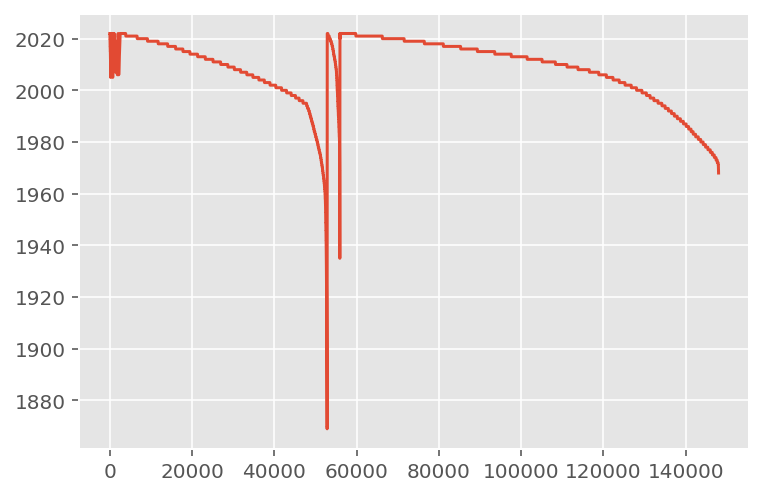

In [874]:
df['year_published'].plot()

✏️  The ~1880 article would have been around the time when electrical activity was first recorded in the brain... I'll probably remove it later, but will keep it for now as it feels quite cool to have the entire history of neuroscience on my computer!

Moving on to **publisher** for now:

In [875]:
len(df.publisher.unique())

3

In [876]:
df.publisher.value_counts()

Springer          81787
Nature            48913
BioMed Central     8673
Name: publisher, dtype: int64

In [877]:
publisher_data_dictionary = {"Springer" : 0,
                             "Nature" : 1,
                             "BioMed Central" : 2}

df = df.replace({"publisher": publisher_data_dictionary})

**Language:** keeping english results only

In [878]:
df.language.value_counts()

en    139018
de       309
fr        39
nl         5
it         2
Name: language, dtype: int64

In [879]:
df = df[df["language"] == "en"]
df.language.value_counts()

en    139018
Name: language, dtype: int64

In [880]:
df = df.drop("language", axis=1)

Published **online** / published in **print**:

In [881]:
len(df["date_online"].isna() == True) == len(df["date_print"].isna() == True)

True

✏️ Just going to drop these...

In [882]:
df = df.drop("date_online", axis=1).drop("date_print", axis=1)

**Open access** munging:

In [883]:
df.is_open_access.value_counts()

false    115590
true      23428
Name: is_open_access, dtype: int64

In [884]:
open_access_data_dictionary = {"false" : 0,
                               "true" : 1}

df = df.replace({"is_open_access": open_access_data_dictionary})

**Issue type:**

In [885]:
df.issue_type.value_counts()

Regular       131020
Combined        2627
Supplement      1789
Name: issue_type, dtype: int64

In [886]:
issue_type_data_dictionary = {"Regular" : 0,
                              "Combined" : 1,
                              "Supplement" : 2}

df = df.replace({"issue_type": issue_type_data_dictionary})

✏️ Label 3 will be for unknown:will add it to the data dictionary later.

In [887]:
df.issue_type.fillna(3, inplace=True)

✏️ Keeping issue type for now, but might remove it later.

**Content type:**

In [888]:
df.content_type.value_counts()

Article    139018
Name: content_type, dtype: int64

✏️ Unnecessary, but at least I can confirm they're all, indeed, articles.

In [889]:
df = df.drop("content_type", axis=1)

**Genre:**

In [890]:
df.genre.value_counts()

OriginalPaper                                                                   44506
OriginalPaper&Original Paper                                                     9300
BriefCommunication                                                               8677
OriginalPaper&Research                                                           6896
OriginalPaper&Article                                                            6318
                                                                                ...  
OriginalPaper&Systematic Review                                                     1
News&Ask The Editor                                                                 1
EditorialNotes&Symposium, Pedatric Neurology                                        1
OriginalPaper&Methods, Models, Standards                                            1
ReviewPaper&Neurology and Preclinical Neurological Studies - Review Articles        1
Name: genre, Length: 2392, dtype: int64

✏️ Okay... I'll split these up and see what I can do with this.

In [891]:
df[['first_genre', 'second_genre']] = df['genre'].str.split('&', 1, expand=True)

In [892]:
df.first_genre.value_counts()

OriginalPaper          99477
BriefCommunication     12794
ReviewPaper            10931
News                    4937
Letter                  3994
Erratum                 2153
BookReview              1595
EditorialNotes          1243
Report                  1026
Abstract                 264
Legacy                   228
Announcement             223
Interview                 67
Events                    63
ContinuingEducation       18
Acknowledgments            5
Name: first_genre, dtype: int64

In [893]:
df.second_genre.value_counts()

Original Paper                                              9314
Research                                                    6899
Article                                                     6321
Original Communication                                      4055
Original Article                                            3961
                                                            ... 
AGEING                                                         1
Neuroinflammation                                              1
Impact of Food Aid on Food Variety and Dietary Diversity       1
Medicine                                                       1
Laboratory Investigation- Human/Animal Tissue                  1
Name: second_genre, Length: 1982, dtype: int64

I'll definitely remove: 

- Events                    
- Continuing Education       
- Acknowledgments  

The rest I will come back to a little later...

In [894]:
df = df[df["first_genre"].isin(["Events", "ContinuingEducation", "Acknowledgments"]) == False]

**Article length:**

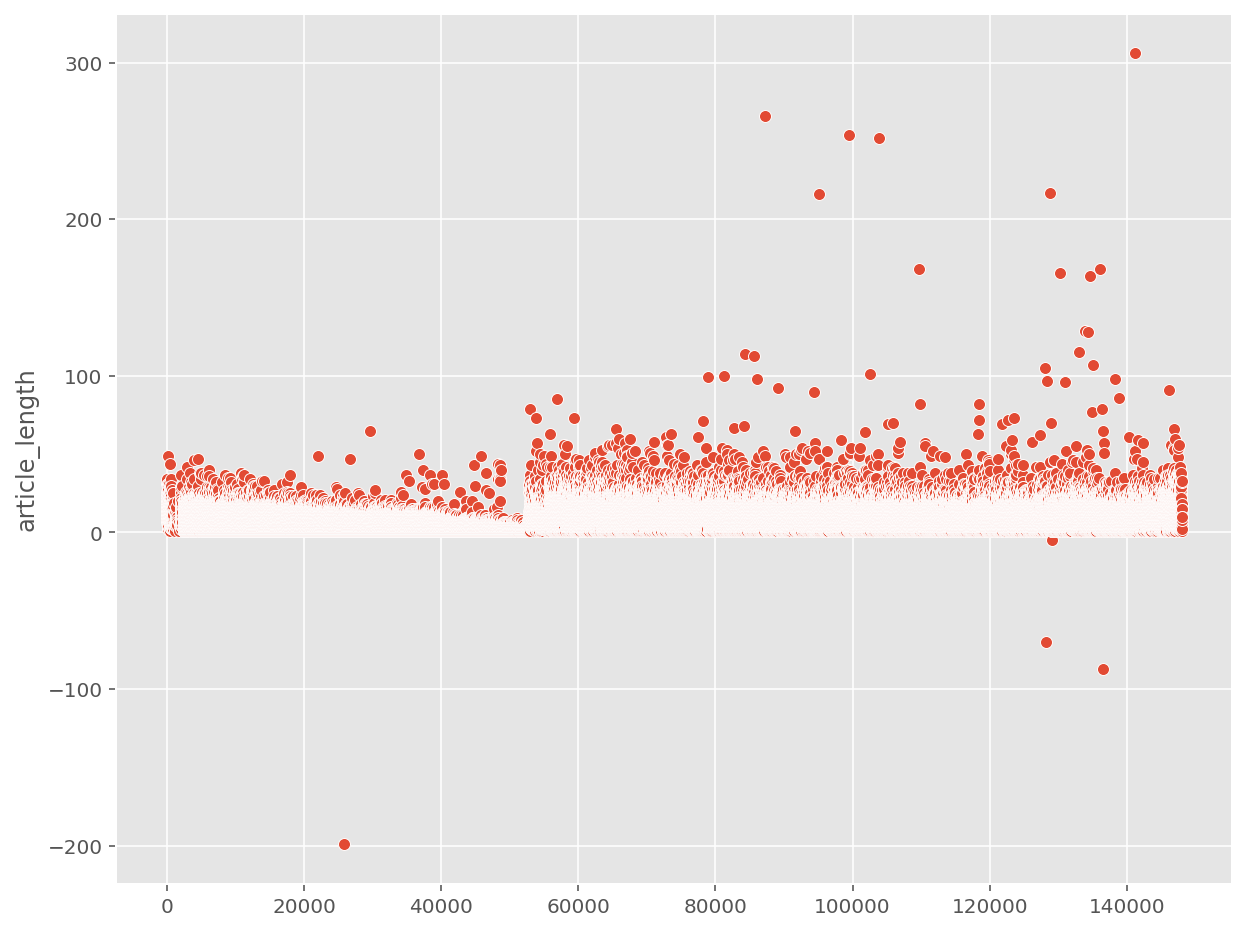

In [895]:
fig, ax = plt.subplots(figsize=(10,8))
sns.scatterplot(data=df["article_length"], ax=ax);

✏️ Removing negative values...

In [896]:
df = df[df["article_length"] >= 0]

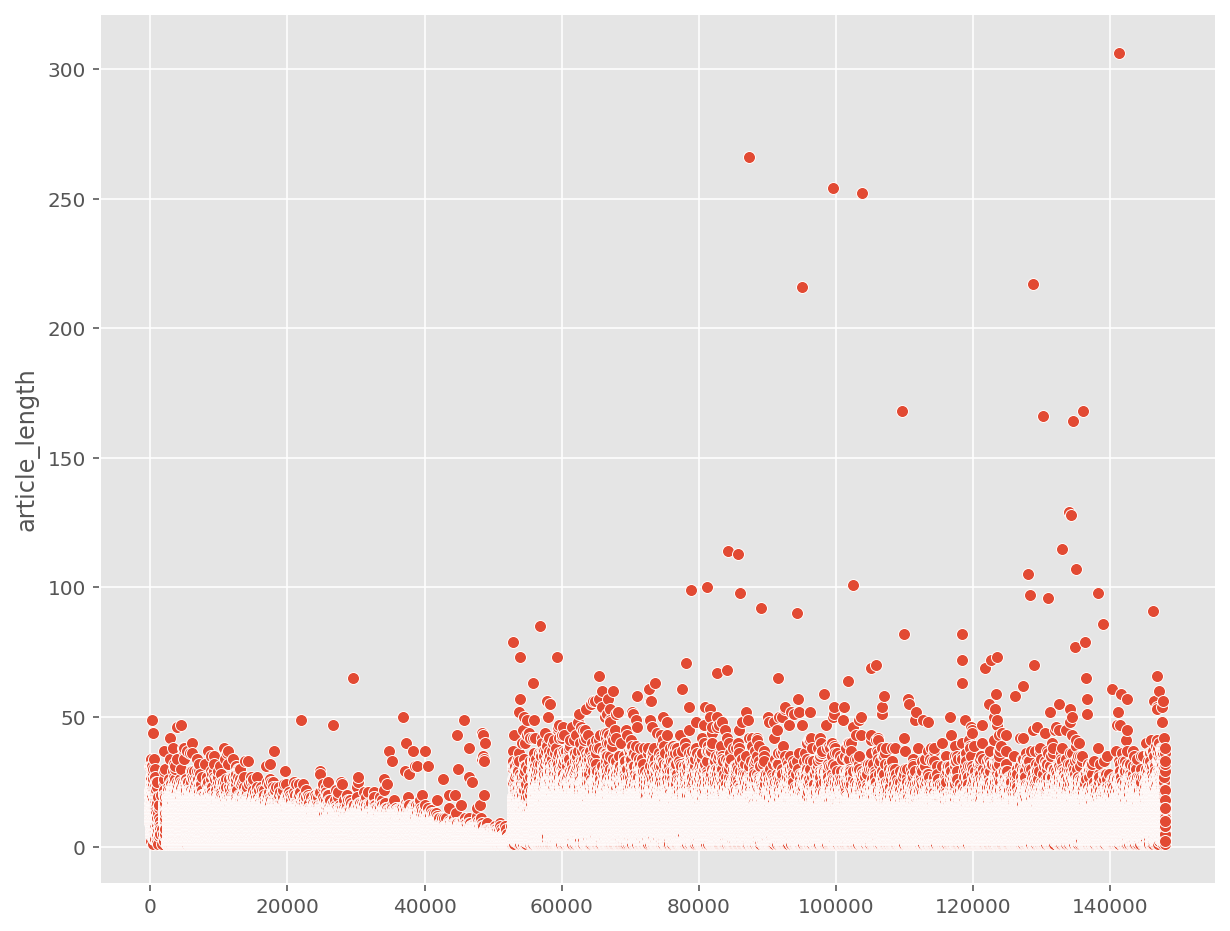

In [897]:
fig, ax = plt.subplots(figsize=(10,8))
sns.scatterplot(data=df["article_length"], ax=ax);

✏️   Will remove outliers during EDA...

**Abstracts:**

In [898]:
len(df.abstract.unique()) == len(df)

False

✏️ Same abstract = same paper. Removing...

In [899]:
df = df.drop_duplicates(subset="abstract")

In [900]:
len(df.abstract.unique()) == len(df)

True

In [901]:
df.abstract

0         Virtual Reality (VR) is becoming an increasing...
1         A functional neuron has been developed from a ...
2         Chronic stress impairs radial neural stem cell...
3         This study explores the factors that influence...
4         The purpose of this paper is to delineate the ...
                                ...                        
148008    A study has been made of the cation-binding ca...
148013    We studied microscopically in serial sections ...
148014    In order to study the integrative action of th...
148015    Acetylcholinesterase activity of autonomic ner...
148016    A preliminary study on the patho-anatomical ch...
Name: abstract, Length: 119998, dtype: object

**Dealing with authors**:

In [902]:
df.first_author.value_counts()

Whalley Katherine     145
Yates Darran          144
Bray Natasha          122
Welberg Leonie        120
Lewis Sian            112
                     ... 
Daughters Stacey B      1
Walsberg G E            1
Hsieh Lawrence S        1
Harrap Michael J M      1
Barr Maureen M          1
Name: first_author, Length: 93785, dtype: int64

Making an **author count** variable by counting the "&" character I inserted between authors when acquiring the data:

In [903]:
df.other_authors.fillna("Single Author", inplace = True)

In [904]:
author_counts = []

for article in df.other_authors:
    author_counts.append(article.count("&") + 1)

In [905]:
df["author_count"] = author_counts

Making **second** & **third author** columns and dropping the rest:

In [906]:
df[['second_author', 'third_author']] = df['other_authors'].str.split('&', 1, expand=True)

In [907]:
df['third_author'].fillna("Two Authors", inplace = True)

In [908]:
df['second_author'] = [x.replace(",", "").replace(".", "") for x in df['second_author']]
df['third_author'] = [x.replace(",", "").replace(".", "") for x in df['third_author']]

In [909]:
df["third_author"] = df["third_author"].str.replace("(&).*","", regex = True)

In [910]:
df.pop("other_authors")

0                        Dutt, Christopher S. & Baker, Jeff
1                                       Yao, Zhao & Ma, Jun
2         Wang, Suji & Yu, Dandan & Lu, Xinyi & Zhao, Xi...
3         Arakpogun, Emmanuel Ogiemwonyi & Vu, Mai Chi &...
4                    Fan, Hongmiao & Ma, Liang & Wang, Chen
                                ...                        
148008                                        Single Author
148013                 Ariëns Kappers, J. & Jongkind, J. F.
148014    Domínguez, R. & Sas, J. & Benedetti, W. L. & A...
148015                      Knyihár, Elisabeth & Halász, N.
148016                                         Sorander, P.
Name: other_authors, Length: 119998, dtype: object

Going back to **genres**:

In [911]:
df.first_genre.value_counts()

OriginalPaper         96211
ReviewPaper           10722
BriefCommunication     8540
News                   1392
Erratum                1096
Report                  857
Letter                  471
BookReview              438
EditorialNotes          156
Interview                53
Announcement             42
Legacy                   17
Abstract                  3
Name: first_genre, dtype: int64

✏️ To focus mostly on the research, I will only include the following genres in my analysis:

In [912]:
genres_to_keep = ["OriginalPaper",
                  "ReviewPaper",
                  "BriefCommunication"]

In [913]:
df = df[df["first_genre"].isin(genres_to_keep) == True]

In [914]:
df.first_genre.value_counts()

OriginalPaper         96211
ReviewPaper           10722
BriefCommunication     8540
Name: first_genre, dtype: int64

✏️ Second genre inpsection....

In [915]:
df.second_genre.value_counts().head(20)

Original Paper                                                       9282
Research                                                             6896
Article                                                              6310
Original Communication                                               4045
Original Article                                                     3864
Review                                                               2787
Review Article                                                       1374
ORIGINAL COMMUNICATION                                               1313
Research Article                                                      986
Original Investigations                                               905
Invited Review                                                        877
Research article                                                      876
                                                                      760
Original Research                     

In [916]:
df['second_genre'].fillna("SingleGenre", inplace=True)

In [917]:
df['second_genre'] = [x.replace(" ", "") for x in df['second_genre']]

In [918]:
df.second_genre.value_counts().head(20)

SingleGenre                                                   52768
OriginalPaper                                                  9366
Research                                                       6896
Article                                                        6311
OriginalCommunication                                          4047
OriginalArticle                                                3873
Review                                                         2793
ReviewArticle                                                  1375
ORIGINALCOMMUNICATION                                          1313
ResearchArticle                                                 986
OriginalInvestigations                                          905
InvitedReview                                                   878
Researcharticle                                                 876
                                                                760
ORIGINALARTICLE                                 

✏️  There's a lot of naming differences for genres that basically mean the same thing...

In [919]:
original_articles = ["Research", "OriginalArticle", "ResearchArticle", 
                     "ORIGINALARTICLE", "OriginalResearch", 
                     "NeurologyandPreclinicalNeurologicalStudies-OriginalArticle",
                     "NeurologyandPreclinicalNeurologicalStudies-OriginalPaper",
                     "OriginalInvestigations", "OriginalPaperarticle", "ORIGINALPAPER",
                     "FullPapers", "OriginalOriginalPaper", "ExperimentalArticles", "Article",
                     "OriginalPaperArticle", "Ionchannels,receptorsandtransporters"]


for naming_difference in original_articles:
    df['second_genre'] = [x.replace(naming_difference, "OriginalPaper") for x in df['second_genre']]

In [920]:
df.second_genre.value_counts().head(20)

SingleGenre                   52768
OriginalPaper                 31789
OriginalCommunication          4047
Review                         2793
ReviewOriginalPaper            1375
ORIGINALCOMMUNICATION          1313
OriginalPapers                 1221
OriginalPaperOriginalPaper     1026
InvitedReview                   878
                                760
News&Views                      588
ShortCommunication              577
Letter                          573
ShortCommunications             411
ReviewPaper                     396
Originalcommunication           366
CaseReport                      347
Manuscript                      343
EmpiricalOriginalPaper          336
OriginalPaperPaper              304
Name: second_genre, dtype: int64

✏️ ...This is way too time-consuming, and to be honest, I don't see the point in preserving the column in the frist place. WIll drop it and encode the first genre column:

In [921]:
df.pop("second_genre")

0                        SingleGenre
1                        SingleGenre
2         OriginalPaperOriginalPaper
3                        SingleGenre
4                ReviewOriginalPaper
                     ...            
148008                        Papers
148013                   SingleGenre
148014                   SingleGenre
148015                   SingleGenre
148016                   SingleGenre
Name: second_genre, Length: 115473, dtype: object

In [922]:
df.first_genre.value_counts()

OriginalPaper         96211
ReviewPaper           10722
BriefCommunication     8540
Name: first_genre, dtype: int64

In [923]:
genre_data_dictionary = {"OriginalPaper" : 0,
                         "ReviewPaper" : 1,
                         "BriefCommunication" : 2}

df = df.replace({"first_genre": genre_data_dictionary})

In [924]:
df["genre"] = df["first_genre"]

In [925]:
df.pop("first_genre")

0         0
1         0
2         0
3         0
4         1
         ..
148008    0
148013    0
148014    0
148015    0
148016    0
Name: first_genre, Length: 115473, dtype: int64

**Journals:**

In [926]:
df.journal.value_counts().head(50)

Journal of Neurology                                              8348
Nature                                                            7152
Nature Medicine                                                   6770
Nature Neuroscience                                               5825
Journal of Autism and Developmental Disorders                     5524
Journal of Neural Transmission                                    5083
Nature Communications                                             4607
Journal of Comparative Physiology A                               4241
Journal of Molecular Neuroscience                                 3716
Journal of Neuroinflammation                                      3282
Journal of Abnormal Child Psychology                              3017
Pflügers Archiv - European Journal of Physiology                  2529
Journal of comparative physiology                                 2402
Nature Reviews Neuroscience                                       2260
Journa

✏️ There's 1000 different "sub-journals" that these articles come from... I'll probably NLP these. 

**Keywords**

✏️ Also an NLP issue... Might even use these instead of abstracts & extract keywords from abstracts for the missing values somehow?

In [927]:
df.keywords.value_counts()

Statistical and Nonlinear Physics                                                                                                                                                 40
\n                \n              ,\n                \n              ,\n                \n              ,\n                \n              ,\n                \n                   6
\n                \n              ,\n                \n              ,\n                \n                                                                                         5
Oxidative stress,Pathogenesis,Rabies,Rabies virus,Reactive oxygen species                                                                                                          4
Neurodevelopmental Disorder,Timely Review,Disorder Review                                                                                                                          3
                                                                                               

In [928]:
df.keywords = df.keywords.replace('\n                \n              ','', regex=True) 
df.keywords = df.keywords.replace(',,,,,,,', np.nan) 
df.keywords = df.keywords.replace(',,,,,,', np.nan) 
df.keywords = df.keywords.replace(',,,,,', np.nan) 
df.keywords = df.keywords.replace(',,,,', np.nan) 
df.keywords = df.keywords.replace(',,,', np.nan)
df.keywords = df.keywords.replace(',,', np.nan) 

✏️ I'm seeing some duplicates in the keywords field... going to drop duplicates that have the same author, year and title and check if that will remove them.

In [929]:
df.drop_duplicates(['title','date_published'], keep='first', inplace=True)

In [931]:
df.drop_duplicates(['title','first_author'], keep='first', inplace=True)

In [934]:
df.drop_duplicates(['title','year_published'], keep='first', inplace=True)

In [936]:
df[df["title"] == "Separation of pineal extracts by gelfiltration"]

,doi,title,date_published,first_author,journal,publisher,is_open_access,issue_type,genre,keywords,article_length,abstract,year_published,author_count,second_author,third_author
145503,10.1007/BF01300135,Separation of pineal extracts by gelfiltration,1977-09-01,Have-Kirchberg M L L,Journal of Neural Transmission,0,0,0.0,0,"Pineal extract,biopterin (isolation, spectrofl...",16.0,Aqueous extracts of sheep pineal bodies were s...,1977,10,Morée A,Laar J F
146215,10.1007/BF01254138,Separation of pineal extracts by gelfiltration,1976-03-01,Ebels I,Journal of Neural Transmission,0,0,0.0,0,"Pineal extract,indoles (isolation),indoles (sp...",11.0,Aqueous extracts of sheep pineal bodies were s...,1976,1,Horwitz-Bresser A E M,Two Authors
146861,10.1007/BF01243438,Separation of pineal extracts by gelfiltration,1975-03-01,Zurburg W,Journal of Neural Transmission,0,0,0.0,0,"Pineal extract,indoles (gelfiltration),indoles...",11.0,After separation of aqueous extracts of sheep ...,1975,1,Ebels I,Two Authors


✏️  Okay, some titles tend to duplicate because they are consecutive works of groups of authors... I would consider these to be separate so I'll keep them.

Lastly, I will fill the null keyword values with a "None" holder for now, and see what I can do with them later on in the modelling stage (e.g. use repeating abstract words as keywords if necessary.) *The reason for all the null values in the "keywords" field is that not every journal has a "keyword" requirement, so I don't want to lose these records at least before the EDA stage.*

In [937]:
df.keywords.fillna("None", inplace=True)

## Final touches

In [938]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115206 entries, 0 to 148016
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   doi             115206 non-null  object        
 1   title           115206 non-null  object        
 2   date_published  115206 non-null  datetime64[ns]
 3   first_author    115206 non-null  object        
 4   journal         115206 non-null  object        
 5   publisher       115206 non-null  int64         
 6   is_open_access  115206 non-null  int64         
 7   issue_type      115206 non-null  float64       
 8   genre           115206 non-null  int64         
 9   keywords        115206 non-null  object        
 10  article_length  115206 non-null  float64       
 11  abstract        115206 non-null  object        
 12  year_published  115206 non-null  int64         
 13  author_count    115206 non-null  int64         
 14  second_author   115206 non-null  obj

In [939]:
df.columns

Index(['doi', 'title', 'date_published', 'first_author', 'journal',
       'publisher', 'is_open_access', 'issue_type', 'genre', 'keywords',
       'article_length', 'abstract', 'year_published', 'author_count',
       'second_author', 'third_author'],
      dtype='object')

✏️ Removing the dat published column -- the year published will suffice. 

In [940]:
df.pop("date_published")

0        2022-05-23
1        2022-04-12
2        2022-04-01
3        2022-03-02
4        2022-03-01
            ...    
148008   1969-05-01
148013   1968-03-01
148014   1968-03-01
148015   1968-03-01
148016   1968-03-01
Name: date_published, Length: 115206, dtype: datetime64[ns]

✏️ Re-ordering the columns

In [941]:
df = df[['doi', 
    'title',
    'journal',
    'year_published',
    'first_author',
    'second_author',
    'third_author',
    'author_count',
    'genre',
    'publisher',
    'issue_type',
    'article_length',
    'is_open_access',
    'keywords', 
    'abstract']]

df

,doi,title,journal,year_published,first_author,second_author,third_author,author_count,genre,publisher,issue_type,article_length,is_open_access,keywords,abstract
0,10.1007/s10796-022-10286-1,Authenticity in Objects and Activities: Determ...,Information Systems Frontiers,2022,Nam Kichan,Dutt Christopher S,Baker Jeff,2,0,0,3.0,19.0,0,"Virtual reality (VR),Tourism,Heritage,Non-heri...",Virtual Reality (VR) is becoming an increasing...
1,10.1631/FITEE.2100563,Phase synchronization and energy balance betwe...,Frontiers of Information Technology & Electron...,2022,Xie Ying,Yao Zhao,Ma Jun,2,0,0,3.0,14.0,0,"Hamilton energy,Coupling synchronization,Synap...",A functional neuron has been developed from a ...
2,10.1007/s11684-021-0896-8,Cannabidiol prevents depressive-like behaviors...,Frontiers of Medicine,2022,Hou Ming,Wang Suji,Yu Dandan,6,0,0,0.0,13.0,0,"cannabidiol,depression,radial neural stem cell...",Chronic stress impairs radial neural stem cell...
3,10.1007/s10796-022-10258-5,Can you be Mindful? The Effectiveness of Mindf...,Information Systems Frontiers,2022,Rodrigo Padmali,Arakpogun Emmanuel Ogiemwonyi,Vu Mai Chi,4,0,0,3.0,21.0,1,"COVID-19,Digital resilience,Fake news,Informat...",This study explores the factors that influence...
4,10.1007/s42524-021-0182-0,Challenges of human—machine collaboration in r...,Frontiers of Engineering Management,2022,Xiong Wei,Fan Hongmiao,Ma Liang,3,1,0,0.0,15.0,1,"human—machine collaboration,risky decision-mak...",The purpose of this paper is to delineate the ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148008,10.1007/BF01003276,Ion-exchange at the node of Ranvier,The Histochemical Journal,1969,Langley O K,Single Author,Two Authors,1,0,0,0.0,15.0,0,"Barium,Free Surface,Nerve Fibre,Peripheral Ner...",A study has been made of the cation-binding ca...
148013,10.1007/BF02239174,Innervation and fluorescence histochemistry of...,Journal of Neuro-Visceral Relations,1968,Quay W B,Ariëns Kappers J,Jongkind J F,2,0,0,0.0,15.0,0,"Nerve Fiber,Monoamine,Monoamine Oxidase,Fiber ...",We studied microscopically in serial sections ...
148014,10.1007/BF02239176,Comparative study of ovarian hypertrophy and e...,Journal of Neuro-Visceral Relations,1968,Griñó E,Domínguez R,Sas J,5,0,0,0.0,10.0,0,"Central Control,Estral Cycle,Young Generation,...",In order to study the integrative action of th...
148015,10.1007/BF02239173,Ultrastructural localization of acetylcholines...,Journal of Neuro-Visceral Relations,1968,Csillik B,Knyihár Elisabeth,Halász N,2,0,0,0.0,8.0,0,"Public Health,Nerve Fiber,Acetylcholinesterase...",Acetylcholinesterase activity of autonomic ner...


### Fixing the author counts

✏️  I'm noticing issues in the author fields. I'll first fix the "Single Author / Two Authors" Issue:

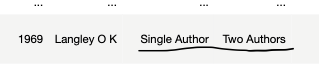

In [942]:
df.loc[df['second_author'] == "Single Author", 'third_author'] = "Single Author"

In [943]:
df

,doi,title,journal,year_published,first_author,second_author,third_author,author_count,genre,publisher,issue_type,article_length,is_open_access,keywords,abstract
0,10.1007/s10796-022-10286-1,Authenticity in Objects and Activities: Determ...,Information Systems Frontiers,2022,Nam Kichan,Dutt Christopher S,Baker Jeff,2,0,0,3.0,19.0,0,"Virtual reality (VR),Tourism,Heritage,Non-heri...",Virtual Reality (VR) is becoming an increasing...
1,10.1631/FITEE.2100563,Phase synchronization and energy balance betwe...,Frontiers of Information Technology & Electron...,2022,Xie Ying,Yao Zhao,Ma Jun,2,0,0,3.0,14.0,0,"Hamilton energy,Coupling synchronization,Synap...",A functional neuron has been developed from a ...
2,10.1007/s11684-021-0896-8,Cannabidiol prevents depressive-like behaviors...,Frontiers of Medicine,2022,Hou Ming,Wang Suji,Yu Dandan,6,0,0,0.0,13.0,0,"cannabidiol,depression,radial neural stem cell...",Chronic stress impairs radial neural stem cell...
3,10.1007/s10796-022-10258-5,Can you be Mindful? The Effectiveness of Mindf...,Information Systems Frontiers,2022,Rodrigo Padmali,Arakpogun Emmanuel Ogiemwonyi,Vu Mai Chi,4,0,0,3.0,21.0,1,"COVID-19,Digital resilience,Fake news,Informat...",This study explores the factors that influence...
4,10.1007/s42524-021-0182-0,Challenges of human—machine collaboration in r...,Frontiers of Engineering Management,2022,Xiong Wei,Fan Hongmiao,Ma Liang,3,1,0,0.0,15.0,1,"human—machine collaboration,risky decision-mak...",The purpose of this paper is to delineate the ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148008,10.1007/BF01003276,Ion-exchange at the node of Ranvier,The Histochemical Journal,1969,Langley O K,Single Author,Single Author,1,0,0,0.0,15.0,0,"Barium,Free Surface,Nerve Fibre,Peripheral Ner...",A study has been made of the cation-binding ca...
148013,10.1007/BF02239174,Innervation and fluorescence histochemistry of...,Journal of Neuro-Visceral Relations,1968,Quay W B,Ariëns Kappers J,Jongkind J F,2,0,0,0.0,15.0,0,"Nerve Fiber,Monoamine,Monoamine Oxidase,Fiber ...",We studied microscopically in serial sections ...
148014,10.1007/BF02239176,Comparative study of ovarian hypertrophy and e...,Journal of Neuro-Visceral Relations,1968,Griñó E,Domínguez R,Sas J,5,0,0,0.0,10.0,0,"Central Control,Estral Cycle,Young Generation,...",In order to study the integrative action of th...
148015,10.1007/BF02239173,Ultrastructural localization of acetylcholines...,Journal of Neuro-Visceral Relations,1968,Csillik B,Knyihár Elisabeth,Halász N,2,0,0,0.0,8.0,0,"Public Health,Nerve Fiber,Acetylcholinesterase...",Acetylcholinesterase activity of autonomic ner...


✏️ Next, the author count is set to 1 for two authors...
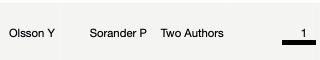

In [944]:
df.loc[df['third_author'] == "Two Authors", 'author_count'] = 2

In [945]:
df

,doi,title,journal,year_published,first_author,second_author,third_author,author_count,genre,publisher,issue_type,article_length,is_open_access,keywords,abstract
0,10.1007/s10796-022-10286-1,Authenticity in Objects and Activities: Determ...,Information Systems Frontiers,2022,Nam Kichan,Dutt Christopher S,Baker Jeff,2,0,0,3.0,19.0,0,"Virtual reality (VR),Tourism,Heritage,Non-heri...",Virtual Reality (VR) is becoming an increasing...
1,10.1631/FITEE.2100563,Phase synchronization and energy balance betwe...,Frontiers of Information Technology & Electron...,2022,Xie Ying,Yao Zhao,Ma Jun,2,0,0,3.0,14.0,0,"Hamilton energy,Coupling synchronization,Synap...",A functional neuron has been developed from a ...
2,10.1007/s11684-021-0896-8,Cannabidiol prevents depressive-like behaviors...,Frontiers of Medicine,2022,Hou Ming,Wang Suji,Yu Dandan,6,0,0,0.0,13.0,0,"cannabidiol,depression,radial neural stem cell...",Chronic stress impairs radial neural stem cell...
3,10.1007/s10796-022-10258-5,Can you be Mindful? The Effectiveness of Mindf...,Information Systems Frontiers,2022,Rodrigo Padmali,Arakpogun Emmanuel Ogiemwonyi,Vu Mai Chi,4,0,0,3.0,21.0,1,"COVID-19,Digital resilience,Fake news,Informat...",This study explores the factors that influence...
4,10.1007/s42524-021-0182-0,Challenges of human—machine collaboration in r...,Frontiers of Engineering Management,2022,Xiong Wei,Fan Hongmiao,Ma Liang,3,1,0,0.0,15.0,1,"human—machine collaboration,risky decision-mak...",The purpose of this paper is to delineate the ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148008,10.1007/BF01003276,Ion-exchange at the node of Ranvier,The Histochemical Journal,1969,Langley O K,Single Author,Single Author,1,0,0,0.0,15.0,0,"Barium,Free Surface,Nerve Fibre,Peripheral Ner...",A study has been made of the cation-binding ca...
148013,10.1007/BF02239174,Innervation and fluorescence histochemistry of...,Journal of Neuro-Visceral Relations,1968,Quay W B,Ariëns Kappers J,Jongkind J F,2,0,0,0.0,15.0,0,"Nerve Fiber,Monoamine,Monoamine Oxidase,Fiber ...",We studied microscopically in serial sections ...
148014,10.1007/BF02239176,Comparative study of ovarian hypertrophy and e...,Journal of Neuro-Visceral Relations,1968,Griñó E,Domínguez R,Sas J,5,0,0,0.0,10.0,0,"Central Control,Estral Cycle,Young Generation,...",In order to study the integrative action of th...
148015,10.1007/BF02239173,Ultrastructural localization of acetylcholines...,Journal of Neuro-Visceral Relations,1968,Csillik B,Knyihár Elisabeth,Halász N,2,0,0,0.0,8.0,0,"Public Health,Nerve Fiber,Acetylcholinesterase...",Acetylcholinesterase activity of autonomic ner...


✏️ All the rest of the articles are one count down (I guess because Smith & Jackson contains only one "&" character but two authors)... I checked some of the articles online to confirm the miscount, so I'm safe to fix it manually now.

In [952]:
def correct_author_count(row):
    if row['third_author'] == "Single Author":
        return 1
    elif row['third_author'] == "Two Authors":
        return 2
    else:
        return row["author_count"] + 1

df['new_author_count'] = df.apply(lambda row : correct_author_count(row), axis=1) 

In [958]:
df.tail(5)

,doi,title,journal,year_published,first_author,second_author,third_author,author_count,genre,publisher,issue_type,article_length,is_open_access,keywords,abstract,new_author_count
148008,10.1007/BF01003276,Ion-exchange at the node of Ranvier,The Histochemical Journal,1969,Langley O K,Single Author,Single Author,1,0,0,0.0,15.0,0,"Barium,Free Surface,Nerve Fibre,Peripheral Ner...",A study has been made of the cation-binding ca...,1
148013,10.1007/BF02239174,Innervation and fluorescence histochemistry of...,Journal of Neuro-Visceral Relations,1968,Quay W B,Ariëns Kappers J,Jongkind J F,2,0,0,0.0,15.0,0,"Nerve Fiber,Monoamine,Monoamine Oxidase,Fiber ...",We studied microscopically in serial sections ...,3
148014,10.1007/BF02239176,Comparative study of ovarian hypertrophy and e...,Journal of Neuro-Visceral Relations,1968,Griñó E,Domínguez R,Sas J,5,0,0,0.0,10.0,0,"Central Control,Estral Cycle,Young Generation,...",In order to study the integrative action of th...,6
148015,10.1007/BF02239173,Ultrastructural localization of acetylcholines...,Journal of Neuro-Visceral Relations,1968,Csillik B,Knyihár Elisabeth,Halász N,2,0,0,0.0,8.0,0,"Public Health,Nerve Fiber,Acetylcholinesterase...",Acetylcholinesterase activity of autonomic ner...,3
148016,10.1007/BF02239177,Changes in the sympathetic nervous system in d...,Journal of Neuro-Visceral Relations,1968,Olsson Y,Sorander P,Two Authors,2,0,0,0.0,10.0,0,"Axonal Degeneration,Neuronal Lesion,Nissl Subs...",A preliminary study on the patho-anatomical ch...,2


✏️ Perfect! It worked. Resetting the author counts below...

In [959]:
df["author_count"] = df['new_author_count']
df.pop('new_author_count')

0         3
1         3
2         7
3         5
4         4
         ..
148008    1
148013    3
148014    6
148015    3
148016    2
Name: new_author_count, Length: 115206, dtype: int64

### Saving the dataset

In [962]:
df.to_pickle("clean_dataset.pkl")  

# 📌 Metrics Scrape

**Re-importing the packages and the dataset** 

In [77]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import requests

plt.style.use('ggplot')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [78]:
df = pd.read_pickle("/Users/anastasiakuzmich/Desktop/GA/clean_dataset.pkl")

✏️ Now that I have the articles I want to explore in a correct format, I need to collect data on the "impact" and "value" these articles had. Annoyingly, all APIs that provide this kind of data are for institutional use only. I'll need to scrape from websites to get this data... Here are the links I could potentially use:

**Springer metrics example page** 

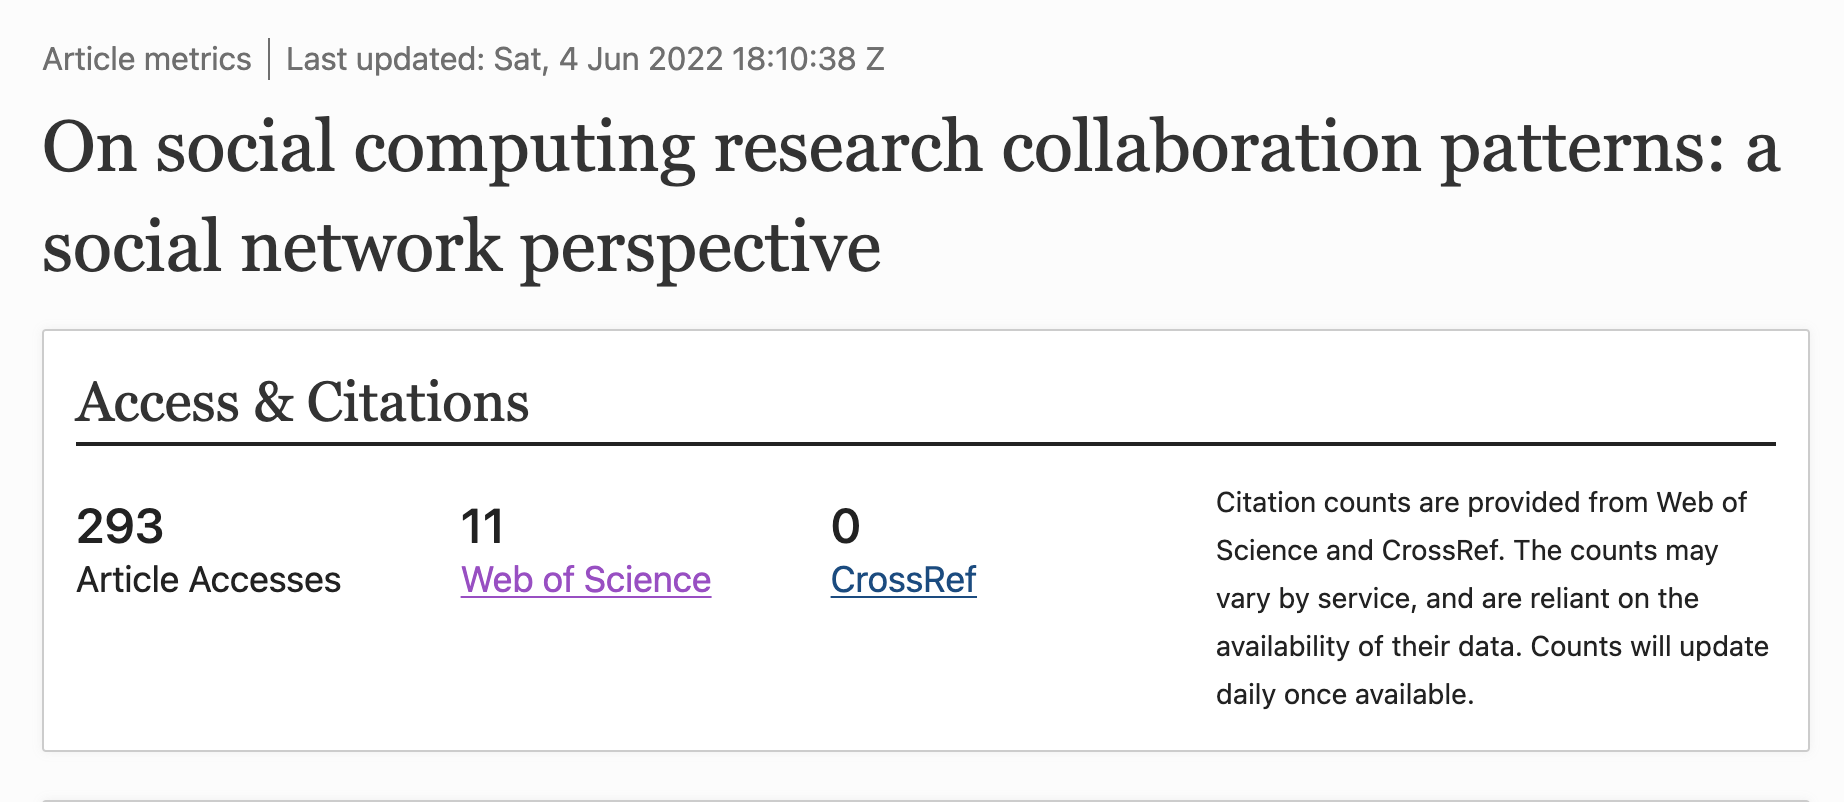

https://link.springer.com/article/10.1007/s10796-022-10286-1/metrics 

**Nature metrics example page**

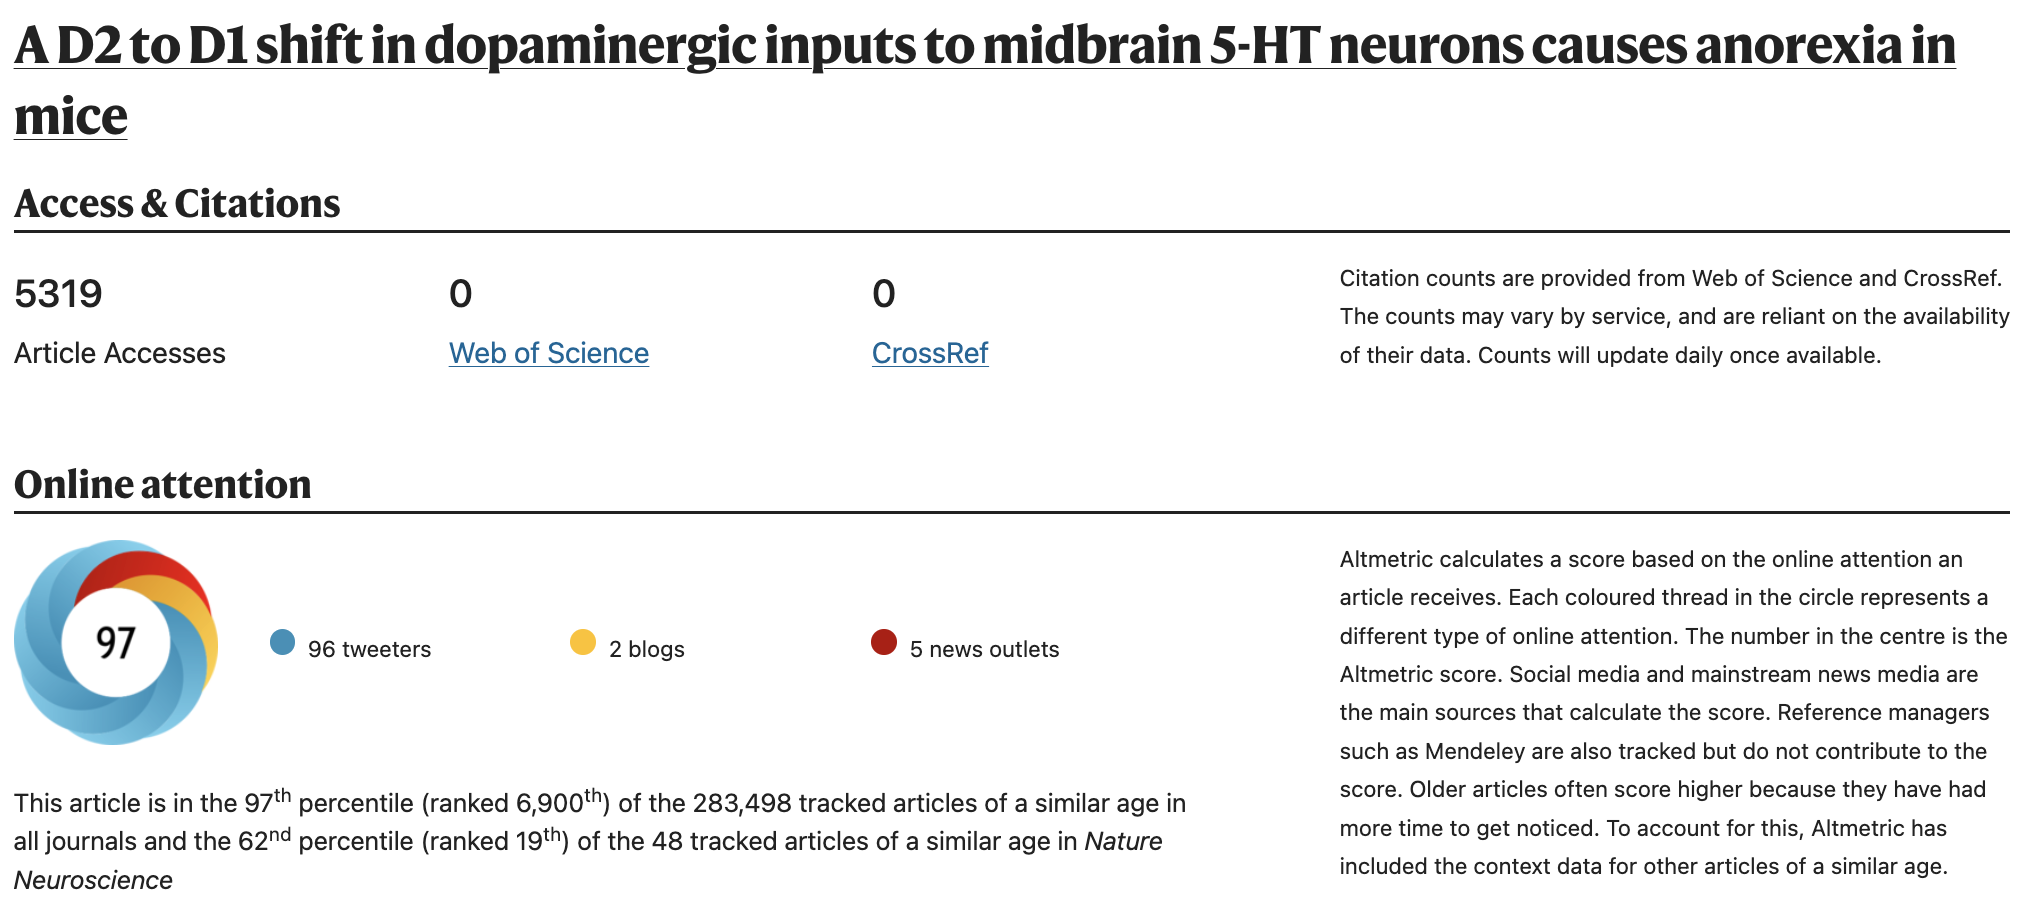
https://www.nature.com/articles/s41593-022-01062-0/metrics 

## Web scraping from the Nature metrics website

✏️ First, I subset into the articles published by Nature.

In [74]:
nature_df = df[df["publisher"] == 1]
nature_df.reset_index()

,index,doi,title,journal,year_published,first_author,second_author,third_author,author_count,genre,publisher,issue_type,article_length,is_open_access,keywords,abstract
0,2489,10.1038/s41583-022-00583-8,Causal mapping of human brain function,Nature Reviews Neuroscience,2022,Siddiqi Shan H,Kording Konrad P,Parvizi Josef,4,1,1,0.0,15.0,0,None,"In this Review, Siddiqi et al. examine causal ..."
1,2494,10.1038/s41583-022-00576-7,"Genomics, convergent neuroscience and progress...",Nature Reviews Neuroscience,2022,Willsey Helen Rankin,Willsey A Jeremy,Wang Belinda,4,1,1,0.0,19.0,0,None,A large number of genes have been associated w...
2,2495,10.1038/s41583-022-00582-9,Priority coding in the visual system,Nature Reviews Neuroscience,2022,Rust Nicole C,Cohen Marlene R,Two Authors,2,1,1,0.0,13.0,0,None,Although we are continuously bombarded with vi...
3,2496,10.1038/s41583-022-00600-w,Engaging with maps,Nature Reviews Neuroscience,2022,Yates Darran,Single Author,Single Author,1,2,1,0.0,2.0,0,None,Mice show degradation of their hippocampal pla...
4,2497,10.1038/s41583-022-00596-3,Social ranking,Nature Reviews Neuroscience,2022,Whalley Katherine,Single Author,Single Author,1,2,1,0.0,1.0,0,None,Two papers explore cortical contributions to t...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35691,143478,10.1038/bjc.1981.96,Cells from normal brain and gliomas synthesize...,British Journal of Cancer,1981,Heikinheimo M,Paasivuo R,Wahlström T,3,0,1,0.0,5.0,0,None,The synthesis of pregnancy-specific beta 1-gly...
35692,143797,10.1038/bjc.1980.337,A biochemical method for assessing the neuroto...,British Journal of Cancer,1980,Rose G P,Dewar A J,Stratford I J,3,0,1,0.0,10.0,0,None,A proven biochemical method for assessing chem...
35693,144568,10.1038/bjc.1979.149,Peripheral electrophysiological parameters in ...,British Journal of Cancer,1979,Von Burg R,Conroy P J,Passalacqua W,3,0,1,0.0,10.0,0,None,The clinical use of the radiosensitizer misoni...
35694,146294,10.1038/bjc.1976.25,Smooth muscle associated antigen in astrocytes...,British Journal of Cancer,1976,Toh B H,Muller H K,Elrick W L,3,0,1,0.0,8.0,0,None,Four human and 4 rat astrocytomata and mammali...


In [80]:
nature_df["doi"]

2489      10.1038/s41583-022-00583-8
2494      10.1038/s41583-022-00576-7
2495      10.1038/s41583-022-00582-9
2496      10.1038/s41583-022-00600-w
2497      10.1038/s41583-022-00596-3
                     ...            
143478           10.1038/bjc.1981.96
143797          10.1038/bjc.1980.337
144568          10.1038/bjc.1979.149
146294           10.1038/bjc.1976.25
147983           10.1038/bjc.1970.21
Name: doi, Length: 35696, dtype: object

✏️ After initially trying to scrape the Nature website, I noticed that the "not found" error comes up when you use the 10.1038 part of the DOI. Annoyingly, I deleted that cell by accident, but that's the reason I remove the first part of the DOI below.

In [87]:
new_doi = []

for doi in nature_df["doi"]:
    new_doi.append(doi.replace("10.1038/", ""))

nature_df["new_doi"] = new_doi

/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_70435/336550809.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nature_df["new_doi"] = new_doi


### Creating request links for each article using their unique identifiers

In [89]:
nature_metrics_urls = []
    
for doi in nature_df["new_doi"]:
    nature_metrics_urls.append("https://www.nature.com/articles/{}/metrics".format(doi))

### Defining the classes for each of the variables I wish to gather

✏️ The three variables below all have the same class, so I will index into them later to separate

In [ ]:
article_access_class = "c-article-metrics__access-citation"
web_of_science_class = "c-article-metrics__access-citation"
crossref_class = "c-article-metrics__access-citation"

✏️ While each of the "online attention" metrics is within its own class, the text for said class is contained within a separate "span". Furthermore, these classes present on the page vary between articles, for example, one can have data on Twitter + Reddit, while another on Facebook + blogs. I therefore defined an "online attention" variable, which I will request for each article, then save all of the available social media data within a single string. I'll separate them into separate sources once within a dataframe.

In [ ]:
news_class = "c-article-metrics__altmetric-key c-article-metrics__altmetric-key--news"
twitter_class = "c-article-metrics__altmetric-key c-article-metrics__altmetric-key--twitter"
mendeley_class = "c-article-metrics__altmetric-key c-article-metrics__altmetric-key--mendeley"

online_attention = "c-article-metrics__altmetric-donut"

### Scraping Test

In [117]:
response = requests.get(nature_metrics_urls[0])
soup = BeautifulSoup(response.text, 'html.parser')
online_attention_results = soup.find(class_=online_attention)

In [119]:
online_attention_results

<div class="c-article-metrics__altmetric-donut">
<div class="c-article-metrics__image">
<img alt="Altmetric score 167" src="https://badges.altmetric.com/?size=180&amp;score=167&amp;types=rttttttf"/>
</div>
<div class="c-article-metrics__legend">
<ul class="u-list-reset" data-altmetric-key="" data-test="metrics-counts">
<li class="u-list-reset">
<span class="c-article-metrics__altmetric-key c-article-metrics__altmetric-key--twitter"></span>
<span>336 tweeters</span>
</li>
<li class="u-list-reset">
<span class="c-article-metrics__altmetric-key c-article-metrics__altmetric-key--facebook"></span>
<span>2 Facebook pages</span>
</li>
<li class="u-list-reset">
<span class="c-article-metrics__altmetric-key c-article-metrics__altmetric-key--reddit"></span>
<span>1 Redditors</span>
</li>
</ul>
</div>
</div>

In [127]:
online_attention_results.find('img')['alt']

'Altmetric score 167'

✏️ Getting all online metrics here...

In [144]:
online_metrics = []

for index, result in enumerate(online_attention_results.find_all('span')):
    if index % 2 != 0:
        online_metrics.append(result.text)

online_metrics_string = ' & '.join(online_metrics)
online_metrics_string

'336 tweeters & 2 Facebook pages & 1 Redditors'

### Defining a Scraper function for the Nature Metrics Website

In [149]:
def get_nature_metrics(url_list):
    
    "Finds metric counts from a list of Nature metrics urls"
    
    from alive_progress import alive_bar
    import time
    
    import requests
    import bs4
    from bs4 import BeautifulSoup
    
    article_accesses = []
    web_of_science = []
    cross_ref = []
    
    online_metrics = []
    altmetric_score = []
    
    with alive_bar(len(url_list), force_tty=True) as bar:
    
        for url in url_list:

            response = requests.get(url)
            soup = BeautifulSoup(response.text, 'html.parser')
            citation_results = soup.find_all(class_=article_access_class)
            online_attention_results = soup.find(class_=online_attention)

            try:
                article_accesses.append(citation_results[0].text)
            except:
                article_accesses.append(np.nan)
            try:    
                web_of_science.append(citation_results[1].text)
            except:
                web_of_science.append(np.nan)
            try:
                cross_ref.append(citation_results[2].text)
            except:
                cross_ref.append(np.nan)
                
            try:
                altmetric_score.append(online_attention_results.find('img')['alt'])
            except:
                altmetric_score.append(np.nan)
                
            temp_online_metrics = []
            
            try:
                
                for index, result in enumerate(online_attention_results.find_all('span')):
                    if index % 2 != 0:
                        temp_online_metrics.append(result.text)
                
                online_metrics_string = ' & '.join(temp_online_metrics)
                online_metrics.append(online_metrics_string)
                
            except:
                online_metrics.append(np.nan)
            
            time.sleep(.00000001)
            bar()
    
    return article_accesses, web_of_science, cross_ref, online_metrics, altmetric_score

In [150]:
# Test - 15 article scrape
get_nature_metrics(url_list = nature_metrics_urls[0:15])

|████████████████████████████████████████| 15/15 [100%] in 8.7s (1.71/s)                                                


(['\n\n            6041\n        \nArticle Accesses\n',
  '\n\n            3694\n        \nArticle Accesses\n',
  '\n\n            3077\n        \nArticle Accesses\n',
  '\n\n            479\n        \nArticle Accesses\n',
  '\n\n            736\n        \nArticle Accesses\n',
  '\n\n            787\n        \nArticle Accesses\n',
  '\n\n            4449\n        \nArticle Accesses\n',
  '\n\n            1055\n        \nArticle Accesses\n',
  '\n\n            1213\n        \nArticle Accesses\n',
  '\n\n            726\n        \nArticle Accesses\n',
  '\n\n            1194\n        \nArticle Accesses\n',
  '\n\n            2123\n        \nArticle Accesses\n',
  '\n\n            2405\n        \nArticle Accesses\n',
  '\n\n            3087\n        \nArticle Accesses\n',
  '\n\n            6913\n        \nArticle Accesses\n'],
 ['\n\n            0\n        \nWeb of Science\n',
  '\n\n            0\n        \nWeb of Science\n',
  '\n\n            0\n        \nWeb of Science\n',
  '\n\n   

✏️ The test worked as I desired, so I'm scraping for all of the Nature articles now. I have removed the "error count" from this function, because I realised that it's mostly redundant.

### Nature Scrape

In [163]:
article_access, web_of_sci, crossref, online, alt_score = get_nature_metrics(url_list = nature_metrics_urls)

|██████▎                                 | ▂▄▆ 5522/35696 [15%] in 1:02:56 (1.5/s, eta: 5:43:53) 48/35696 [0%] in 1:29 (1.7/s, eta: 5:55:56)  ▄▂▂ 257/35696 [1%] in 2:35 (1.7/s, eta: 5:55:38) ▁▃▅ 290/35696 [1%] in 3:00 (1.6/s, eta: 6:04:53)  ▅▇▇ 351/35696 [1%] in 3:39 (1.6/s, eta: 6:07:33)  ▄▂▂ 366/35696 [1%] in 3:48 (1.6/s, eta: 6:06:02)  ▄▂▂ 392/35696 [1%] in 4:03 (1.6/s, eta: 6:04:32)  ▃▅▇ 752/35696 [2%] in 7:48 (1.6/s, eta: 6:01:53) ▆▄▂ 754/35696 [2%] in 7:49 (1.6/s, eta: 6:01:50) ▅▃▁ 765/35696 [2%] in 7:57 (1.6/s, eta: 6:02:14)  ▃▁▃ 868/35696 [2%] in 9:01 (1.6/s, eta: 6:01:24)  ▆▄▂ 875/35696 [2%] in 9:05 (1.6/s, eta: 6:01:16)  ▃▅▇ 997/35696 [3%] in 10:23 (1.6/s, eta: 6:00:58)  1044/35696 [3%] in 10:50 (1.6/s, eta: 5:59:35)  ▇▅▃ 1049/35696 [3%] in 10:53 (1.6/s, eta: 5:59:21)  1050/35696 [3%] in 10:54 (1.6/s, eta: 5:59:21)  ▂▄▆ 1078/35696 [3%] in 11:12 (1.6/s, eta: 5:59:22)  ▃▁▃ 1098/35696 [3%] in 11:26 (1.6/s, eta: 6:00:17)  ▅▇▇ 1144/35696 [3%] in 11:58 (1.6/s, eta: 6:00:51)  ▆█▆ 11

|█████████████▎                          | ▃▅▇ 11879/35696 [33%] in 2:13:45 (1.5/s, eta: 4:28:11) ▁▃▅ 5537/35696 [16%] in 1:03:06 (1.5/s, eta: 5:43:42)  ▇▇▅ 5580/35696 [16%] in 1:03:38 (1.5/s, eta: 5:43:24)  ▅▃▁ 5601/35696 [16%] in 1:03:52 (1.5/s, eta: 5:43:08)  ▁▃▅ 5658/35696 [16%] in 1:04:31 (1.5/s, eta: 5:42:29)  ▄▂▂ 5661/35696 [16%] in 1:04:33 (1.5/s, eta: 5:42:25) in 1:06:48 (1.5/s, eta: 5:41:15)  ▂▂▄ 5896/35696 [17%] in 1:07:25 (1.5/s, eta: 5:40:42)  ▄▂▂ 5900/35696 [17%] in 1:07:27 (1.5/s, eta: 5:40:38)  5920/35696 [17%] in 1:07:41 (1.5/s, eta: 5:40:22)  ▂▄▆ 5975/35696 [17%] in 1:08:22 (1.5/s, eta: 5:40:01)  ▅▃▁ 6085/35696 [17%] in 1:09:36 (1.5/s, eta: 5:38:37)  ▁▃▅ 6114/35696 [17%] in 1:09:54 (1.5/s, eta: 5:38:12) in 1:10:08 (1.5/s, eta: 5:37:53)  ▆▄▂ 6166/35696 [17%] in 1:10:30 (1.5/s, eta: 5:37:34)  ▇▇▅ 6199/35696 [17%] in 1:10:53 (1.5/s, eta: 5:37:14)  ▆█▆ 6224/35696 [17%] in 1:11:10 (1.5/s, eta: 5:37:00) ▁▃▅ 6243/35696 [17%] in 1:11:22 (1.5/s, eta: 5:36:41)  ▅▃▁ 6261/35696 [

|████████████████████▉                   | ▆█▆ 18577/35696 [52%] in 3:26:04 (1.5/s, eta: 3:09:55)  ▆█▆ 11891/35696 [33%] in 2:13:54 (1.5/s, eta: 4:28:03) ▃▅▇ 11930/35696 [33%] in 2:14:24 (1.5/s, eta: 4:27:44)  ▁▃▅ 11956/35696 [33%] in 2:14:42 (1.5/s, eta: 4:27:27) 12001/35696 [34%] in 2:15:12 (1.5/s, eta: 4:26:57)  ▁▃▅ 12002/35696 [34%] in 2:15:13 (1.5/s, eta: 4:26:56)  ▂▄▆ 12079/35696 [34%] in 2:16:02 (1.5/s, eta: 4:25:58)  12087/35696 [34%] in 2:16:07 (1.5/s, eta: 4:25:52)  ▇▇▅ 12105/35696 [34%] in 2:16:18 (1.5/s, eta: 4:25:38)  ▆▄▂ 12106/35696 [34%] in 2:16:19 (1.5/s, eta: 4:25:37)  ▅▇▇ 12156/35696 [34%] in 2:16:51 (1.5/s, eta: 4:25:01) in 2:16:58 (1.5/s, eta: 4:24:55)  ▃▅▇ 12176/35696 [34%] in 2:17:04 (1.5/s, eta: 4:24:46) ▇▇▅ 12199/35696 [34%] in 2:17:17 (1.5/s, eta: 4:24:26)  ▄▂▂ 12244/35696 [34%] in 2:17:46 (1.5/s, eta: 4:23:53)  ▆▄▂ 12341/35696 [35%] in 2:18:51 (1.5/s, eta: 4:22:45) ▆█▆ 12363/35696 [35%] in 2:19:05 (1.5/s, eta: 4:22:30)  ▇▅▃ 12367/35696 [35%] in 2:19:08 (1.5/s,

|███████████████████████████▌            | █▆▄ 24524/35696 [69%] in 4:28:24 (1.5/s, eta: 2:02:17)  ▁▃▅ 18616/35696 [52%] in 3:26:29 (1.5/s, eta: 3:09:27)  ▅▇▇ 18647/35696 [52%] in 3:26:48 (1.5/s, eta: 3:09:05)  ▂▄▆ 18707/35696 [52%] in 3:27:30 (1.5/s, eta: 3:08:27) in 3:28:23 (1.5/s, eta: 3:07:28)  ▃▅▇ 18872/35696 [53%] in 3:29:09 (1.5/s, eta: 3:06:27)  ▄▆█ 18888/35696 [53%] in 3:29:19 (1.5/s, eta: 3:06:16)  ▃▅▇ 18894/35696 [53%] in 3:29:24 (1.5/s, eta: 3:06:13) 18901/35696 [53%] in 3:29:28 (1.5/s, eta: 3:06:08)  ▅▃▁ 18905/35696 [53%] in 3:29:31 (1.5/s, eta: 3:06:05)  ▇▅▃ 18914/35696 [53%] in 3:29:35 (1.5/s, eta: 3:05:58)  ▆█▆ 18922/35696 [53%] in 3:29:40 (1.5/s, eta: 3:05:52) ▆█▆ 18953/35696 [53%] in 3:29:58 (1.5/s, eta: 3:05:30) in 3:30:33 (1.5/s, eta: 3:04:45)  ▂▄▆ 19027/35696 [53%] in 3:30:40 (1.5/s, eta: 3:04:34)  ▄▂▂ 19037/35696 [53%] in 3:30:47 (1.5/s, eta: 3:04:28)  ▇▇▅ 19117/35696 [54%] in 3:31:37 (1.5/s, eta: 3:03:32)  ▅▃▁ 19144/35696 [54%] in 3:31:53 (1.5/s, eta: 3:03:12)  ▆

|██████████████████████████████████▉     | ▃▅▇ 31126/35696 [87%] in 5:31:39 (1.6/s, eta: 48:42)                          in 4:28:34 (1.5/s, eta: 2:02:05)  ▄▂▂ 24630/35696 [69%] in 4:29:28 (1.5/s, eta: 2:01:04)  ▂▄▆ 24640/35696 [69%] in 4:29:34 (1.5/s, eta: 2:00:58)  ▁▃▅ 24699/35696 [69%] in 4:30:09 (1.5/s, eta: 2:00:17) ▃▅▇ 24792/35696 [69%] in 4:31:08 (1.5/s, eta: 1:59:15)  ▆▄▂ 24799/35696 [69%] in 4:31:11 (1.5/s, eta: 1:59:10)  ▆▄▂ 24807/35696 [69%] in 4:31:16 (1.5/s, eta: 1:59:05)  ▅▃▁ 24816/35696 [70%] in 4:31:22 (1.5/s, eta: 1:58:59)  ▃▁▃ 24856/35696 [70%] in 4:31:47 (1.5/s, eta: 1:58:32)  ▁▃▅ 24860/35696 [70%] in 4:31:50 (1.5/s, eta: 1:58:30)  ▃▅▇ 24872/35696 [70%] in 4:31:58 (1.5/s, eta: 1:58:22)  ▅▇▇ 24897/35696 [70%] in 4:32:14 (1.5/s, eta: 1:58:05)  ▃▅▇ 24930/35696 [70%] in 4:32:34 (1.5/s, eta: 1:57:43)  ▁▃▅ 24938/35696 [70%] in 4:32:38 (1.5/s, eta: 1:57:37)  ▁▃▅ 24967/35696 [70%] in 4:32:56 (1.5/s, eta: 1:57:18)  ▆█▆ 24990/35696 [70%] in 4:33:10 (1.5/s, eta: 1:57:02)  ▃▁▃ 24

|████████████████████████████████████████| 35696/35696 [100%] in 6:20:57.4 (1.56/s)                                     n 5:31:45 (1.6/s, eta: 48:36)  ▃▅▇ 31142/35696 [87%] in 5:31:49 (1.6/s, eta: 48:32)  ▆█▆ 31162/35696 [87%] in 5:32:02 (1.6/s, eta: 48:19)  ▁▃▅ 31204/35696 [87%] in 5:32:29 (1.6/s, eta: 47:52) in 5:32:30 (1.6/s, eta: 47:50)  ▂▄▆ 31212/35696 [87%] in 5:32:34 (1.6/s, eta: 47:47) ▅▇▇ 31229/35696 [87%] in 5:32:44 (1.6/s, eta: 47:36)  ▄▂▂ 31272/35696 [88%] in 5:33:16 (1.6/s, eta: 47:09)  ▄▂▂ 31318/35696 [88%] in 5:33:48 (1.6/s, eta: 46:40)  ▂▄▆ 31363/35696 [88%] in 5:34:16 (1.6/s, eta: 46:11)  ▄▂▂ 31365/35696 [88%] in 5:34:18 (1.6/s, eta: 46:10)  ▅▇▇ 31477/35696 [88%] in 5:35:34 (1.6/s, eta: 44:59)  ▁▃▅ 31487/35696 [88%] in 5:35:41 (1.6/s, eta: 44:53)  ▃▅▇ 31545/35696 [88%] in 5:36:22 (1.6/s, eta: 44:16)  ▁▃▅ 31609/35696 [89%] in 5:37:01 (1.6/s, eta: 43:35)  ▆▄▂ 31640/35696 [89%] in 5:37:23 (1.6/s, eta: 43:15)  ▂▄▆ 31668/35696 [89%] in 5:37:41 (1.6/s, eta: 42:58) (1.6/s, et

In [164]:
# Saving the data into a dataframe

nature_metrics_dictionary = {"article_accesses" : article_access,
                             "web_of_science" : web_of_sci,
                             "cross_ref" : crossref,
                             "online_metrics" : online,
                             "altmetric_score" : alt_score}

nature_metrics_df = pd.DataFrame(data=nature_metrics_dictionary)
nature_metrics_df.to_pickle("nature_metrics_df.pkl")

In [166]:
nature_metrics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35696 entries, 0 to 35695
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   article_accesses  32506 non-null  object
 1   web_of_science    32506 non-null  object
 2   cross_ref         32506 non-null  object
 3   online_metrics    32123 non-null  object
 4   altmetric_score   32123 non-null  object
dtypes: object(5)
memory usage: 1.4+ MB


✏️ Creating a doi index so that I can re-join the df's later

In [172]:
nature_metrics_df['doi'] = list(nature_df["new_doi"])

### Additional scrape for the missing DOIs

✏️ Within this section, I had to manually alter some of the DOIs through visual inspection of their corresponding URLs

In [178]:
nature_metrics_df[nature_metrics_df["article_accesses"].isna() == True]["doi"].value_counts()

75063              1
72910              1
2775               1
sj.ejhg.5201595    1
4695               1
                  ..
77462              1
ijo.2014.151       1
77548              1
3708               1
ejhg.2015.159      1
Name: doi, Length: 3190, dtype: int64

✏️ nrdp.2018.29 on the nature website is "nrdp201829" & bjc.1981.96 on the nature website is "bjc198196". So the empty values got scraped as a result of variation in DOI indexing. I will remove the full stops from the remaining doi's & try to scrape them below...

In [191]:
nature_na_subset = nature_metrics_df[nature_metrics_df["article_accesses"].isna() == True]
nature_na_subset = nature_na_subset.reset_index()

In [ ]:
nature_na_subset.pop("index")

In [195]:
second_doi = []

for doi in nature_na_subset["doi"]:
    second_doi.append(doi.replace(".", ""))

nature_na_subset["second_doi"] = second_doi

In [196]:
nature_na_subset["second_doi"]

0       nrdp201829
1       nrdp201824
2       nrdp201822
3        nrdp20188
4        nrdp20186
           ...    
3185     bjc198196
3186    bjc1980337
3187    bjc1979149
3188     bjc197625
3189     bjc197021
Name: second_doi, Length: 3190, dtype: object

In [197]:
sub_nature_metrics_urls = []
    
for doi in nature_na_subset["second_doi"]:
    sub_nature_metrics_urls.append("https://www.nature.com/articles/{}/metrics".format(doi))

nature_na_subset["sub_urls"] = sub_nature_metrics_urls

In [198]:
article_accesses_sub, web_of_science_sub, cross_ref_sub, online_metrics_sub, altmetric_score_sub = get_nature_metrics(url_list = 
                                                                                                                      sub_nature_metrics_urls)

|████████████████████████████████████████| 3190/3190 [100%] in 26:16.6 (2.02/s)                                          1338/3190 [42%] in 6:45 (3.3/s, eta: 9:21) 2140/3190 [67%] in 13:50 (2.6/s, eta: 6:47) ▂▄▆ 2481/3190 [78%] in 18:37 (2.2/s, eta: 5:19)  3107/3190 [97%] in 25:24 (2.0/s, eta: 41s) 


In [203]:
sub_nature_metrics_dictionary = {"article_accesses" : article_accesses_sub,
                             "web_of_science" : web_of_science_sub,
                             "cross_ref" : cross_ref_sub,
                             "online_metrics" : online_metrics_sub,
                             "altmetric_score" : altmetric_score_sub, 
                            "second_doi" : list(nature_na_subset["second_doi"])}

sub_nature_metrics_df = pd.DataFrame(data=sub_nature_metrics_dictionary)

In [234]:
inner_joined_total = sub_nature_metrics_df.merge(nature_na_subset, on='second_doi', how='outer')
inner_joined_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3190 entries, 0 to 3189
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   article_accesses_x  1010 non-null   object
 1   web_of_science_x    1010 non-null   object
 2   cross_ref_x         1010 non-null   object
 3   online_metrics_x    1010 non-null   object
 4   altmetric_score_x   1010 non-null   object
 5   second_doi          3190 non-null   object
 6   article_accesses_y  0 non-null      object
 7   web_of_science_y    0 non-null      object
 8   cross_ref_y         0 non-null      object
 9   online_metrics_y    0 non-null      object
 10  altmetric_score_y   0 non-null      object
 11  doi                 3190 non-null   object
 12  sub_urls            3190 non-null   object
dtypes: object(13)
memory usage: 348.9+ KB


In [235]:
inner_joined_total = inner_joined_total.drop(['article_accesses_y', 
                                              'web_of_science_y', 
                                              'cross_ref_y', 
                                              'online_metrics_y', 
                                              'altmetric_score_y', 
                                              'second_doi', 
                                              'sub_urls'], axis=1)

In [236]:
inner_joined_total.columns = [x.lower().replace('_x', '') for x in inner_joined_total.columns]
inner_joined_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3190 entries, 0 to 3189
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   article_accesses  1010 non-null   object
 1   web_of_science    1010 non-null   object
 2   cross_ref         1010 non-null   object
 3   online_metrics    1010 non-null   object
 4   altmetric_score   1010 non-null   object
 5   doi               3190 non-null   object
dtypes: object(6)
memory usage: 174.5+ KB


✏️ Okay, so by removing full stops from the DOI's I was able to scrape 1010 additional article metrics. I will now explore other differences in DOI phrasing by Nature and manually replace them.

In [237]:
# for doi in inner_joined_total[inner_joined_total["article_accesses"].isna() == True]["doi"].sort_values():
#     print(doi)

In [238]:
inner_joined_total['new_doi'] = list(inner_joined_total['doi']) 
inner_joined_total['new_doi'] = [x.lower() for x in inner_joined_total['new_doi']]

# 10.xxxx/ deletion
inner_joined_total['new_doi'] = [x.replace("10.1007/", "") for x in inner_joined_total['new_doi']]
inner_joined_total['new_doi'] = [x.replace("10.1016/", "") for x in inner_joined_total['new_doi']]
inner_joined_total['new_doi'] = [x.replace("10.1054/", "") for x in inner_joined_total['new_doi']]
inner_joined_total['new_doi'] = [x.replace("10.1295/", "") for x in inner_joined_total['new_doi']]
inner_joined_total['new_doi'] = [x.replace("10.4104/", "") for x in inner_joined_total['new_doi']]
inner_joined_total['new_doi'] = [x.replace("10.1159/", "") for x in inner_joined_total['new_doi']]
inner_joined_total['new_doi'] = [x.replace("10.1057/", "") for x in inner_joined_total['new_doi']]
inner_joined_total['new_doi'] = [x.replace("10.4248/", "") for x in inner_joined_total['new_doi']]

# Journal Identifier Deletions
inner_joined_total['new_doi'] = [x.replace("sj.bdj.", "") for x in inner_joined_total['new_doi']]
inner_joined_total['new_doi'] = [x.replace("nm1202-", "nm") for x in inner_joined_total['new_doi']]
inner_joined_total['new_doi'] = [x.replace("nn0602-", "nn") for x in inner_joined_total['new_doi']]
inner_joined_total['new_doi'] = [x.replace("sj.bjc.", "") for x in inner_joined_total['new_doi']]
inner_joined_total['new_doi'] = [x.replace("sj.ejcn.", "") for x in inner_joined_total['new_doi']]
inner_joined_total['new_doi'] = [x.replace("sj.ejhg.", "") for x in inner_joined_total['new_doi']]
inner_joined_total['new_doi'] = [x.replace("sj.ijir.", "") for x in inner_joined_total['new_doi']]
inner_joined_total['new_doi'] = [x.replace("sj.ijo.", "") for x in inner_joined_total['new_doi']]
inner_joined_total['new_doi'] = [x.replace("sj.jhh.", "") for x in inner_joined_total['new_doi']]
inner_joined_total['new_doi'] = [x.replace("sj.jp.", "") for x in inner_joined_total['new_doi']]
inner_joined_total['new_doi'] = [x.replace("sj.tpj.", "") for x in inner_joined_total['new_doi']]
inner_joined_total['new_doi'] = [x.replace("sj.jes.", "") for x in inner_joined_total['new_doi']]
inner_joined_total['new_doi'] = [x.replace("sj.jhh.", "") for x in inner_joined_total['new_doi']]

inner_joined_total['doi'] = [x.replace(".", "") for x in inner_joined_total['new_doi']]

In [239]:
inner_joined_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3190 entries, 0 to 3189
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   article_accesses  1010 non-null   object
 1   web_of_science    1010 non-null   object
 2   cross_ref         1010 non-null   object
 3   online_metrics    1010 non-null   object
 4   altmetric_score   1010 non-null   object
 5   doi               3190 non-null   object
 6   new_doi           3190 non-null   object
dtypes: object(7)
memory usage: 328.4+ KB


In [243]:
last_nature_metrics_urls = []
    
for doi in inner_joined_total[inner_joined_total["article_accesses"].isna() == True]["new_doi"]:
    last_nature_metrics_urls.append("https://www.nature.com/articles/{}/metrics".format(doi))

last_article, last_web, last_cross, last_online, last_altmetric = get_nature_metrics(url_list = last_nature_metrics_urls)

|████████████████████████████████████████| 2180/2180 [100%] in 12:56.6 (2.81/s)                                         ▄▂▂ 1846/2180 [85%] in 8:35 (3.6/s, eta: 1:33) 


### Merging and cleaning the metrics

In [245]:
last_nature_metrics_dictionary = {"article_accesses" : last_article,
                             "web_of_science" : last_web,
                             "cross_ref" : last_cross,
                             "online_metrics" : last_online,
                             "altmetric_score" : last_altmetric, 
                            "new_doi" : list(inner_joined_total[inner_joined_total["article_accesses"].isna() == True]["new_doi"])}

last_nature_metrics_df = pd.DataFrame(data=last_nature_metrics_dictionary)

In [255]:
nature_extra = inner_joined_total.merge(last_nature_metrics_df, on='new_doi', how='outer')
nature_extra.columns = [x.lower().replace('_x', '') for x in nature_extra.columns]
nature_extra.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3190 entries, 0 to 3189
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   article_accesses    1010 non-null   object
 1   web_of_science      1010 non-null   object
 2   cross_ref           1010 non-null   object
 3   online_metrics      1010 non-null   object
 4   altmetric_score     1010 non-null   object
 5   doi                 3190 non-null   object
 6   new_doi             3190 non-null   object
 7   article_accesses_y  429 non-null    object
 8   web_of_science_y    429 non-null    object
 9   cross_ref_y         429 non-null    object
 10  online_metrics_y    428 non-null    object
 11  altmetric_score_y   428 non-null    object
dtypes: object(12)
memory usage: 324.0+ KB


In [256]:
nature_extra['article_accesses'].fillna(nature_extra['article_accesses_y'], inplace=True)
nature_extra['web_of_science'].fillna(nature_extra['web_of_science_y'], inplace=True)
nature_extra['cross_ref'].fillna(nature_extra['cross_ref_y'], inplace=True)
nature_extra['online_metrics'].fillna(nature_extra['online_metrics_y'], inplace=True)
nature_extra['altmetric_score'].fillna(nature_extra['altmetric_score_y'], inplace=True)

In [258]:
nature_extra = nature_extra.drop(['article_accesses_y', 
                                  'web_of_science_y', 
                                  'cross_ref_y', 
                                  'online_metrics_y', 
                                  'altmetric_score_y'], axis=1)

nature_extra.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3190 entries, 0 to 3189
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   article_accesses  1439 non-null   object
 1   web_of_science    1439 non-null   object
 2   cross_ref         1439 non-null   object
 3   online_metrics    1438 non-null   object
 4   altmetric_score   1438 non-null   object
 5   doi               3190 non-null   object
 6   new_doi           3190 non-null   object
dtypes: object(7)
memory usage: 199.4+ KB


✏️ Although the steps above were a little meticulous & time consuming (and also confusing with me trying to figure out when to merge/join dataframes & apparently making the wrong choices), I managed to scrape 1439 article metrics that I wouldn't have had otherwise! I will now join them with the rest of the Nature data & locally save the dataset.

In [263]:
nature_metrics_df.columns = [x.lower().replace('doi', 'new_doi') for x in nature_metrics_df.columns]
nature_metrics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35696 entries, 0 to 35695
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   article_accesses  32506 non-null  object
 1   web_of_science    32506 non-null  object
 2   cross_ref         32506 non-null  object
 3   online_metrics    32123 non-null  object
 4   altmetric_score   32123 non-null  object
 5   new_doi           35696 non-null  object
dtypes: object(6)
memory usage: 1.6+ MB


In [266]:
final_nature_metrics = nature_metrics_df.merge(nature_extra, on='new_doi', how='outer')

final_nature_metrics.columns = [x.lower().replace('_x', '') for x in final_nature_metrics.columns]

final_nature_metrics['article_accesses'].fillna(final_nature_metrics['article_accesses_y'], inplace=True)
final_nature_metrics['web_of_science'].fillna(final_nature_metrics['web_of_science_y'], inplace=True)
final_nature_metrics['cross_ref'].fillna(final_nature_metrics['cross_ref_y'], inplace=True)
final_nature_metrics['online_metrics'].fillna(final_nature_metrics['online_metrics_y'], inplace=True)
final_nature_metrics['altmetric_score'].fillna(final_nature_metrics['altmetric_score_y'], inplace=True)

final_nature_metrics = final_nature_metrics.drop(['article_accesses_y', 
                                                  'web_of_science_y', 
                                                  'cross_ref_y',
                                                  'online_metrics_y', 
                                                  'altmetric_score_y',
                                                  'doi'], axis=1)

final_nature_metrics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36146 entries, 0 to 36145
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   article_accesses  33945 non-null  object
 1   web_of_science    33945 non-null  object
 2   cross_ref         33945 non-null  object
 3   online_metrics    33561 non-null  object
 4   altmetric_score   33561 non-null  object
 5   new_doi           36146 non-null  object
dtypes: object(6)
memory usage: 1.9+ MB


In [269]:
df = pd.merge(final_nature_metrics, nature_df, on=['new_doi'])
df.dropna(how='any', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33133 entries, 0 to 35695
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   article_accesses  33133 non-null  object 
 1   web_of_science    33133 non-null  object 
 2   cross_ref         33133 non-null  object 
 3   online_metrics    33133 non-null  object 
 4   altmetric_score   33133 non-null  object 
 5   new_doi           33133 non-null  object 
 6   doi               33133 non-null  object 
 7   title             33133 non-null  object 
 8   journal           33133 non-null  object 
 9   year_published    33133 non-null  int64  
 10  first_author      33133 non-null  object 
 11  second_author     33133 non-null  object 
 12  third_author      33133 non-null  object 
 13  author_count      33133 non-null  int64  
 14  genre             33133 non-null  int64  
 15  publisher         33133 non-null  int64  
 16  issue_type        33133 non-null  float6

In [271]:
df.to_pickle("final_nature_subset_with_metrics.pkl")

✏️ Okay... that was very messy but I've retreived the vast majority of the metrics. I'll do the same with the Springer publisher now.

## Web scraping from the Springer metrics website

In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import requests

plt.style.use('ggplot')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [24]:
### Subsetting into the articles published by Springer
df = pd.read_pickle("/Users/anastasiakuzmich/Desktop/GA/clean_dataset.pkl")
springer_subset = df[df["publisher"] == 0]

### Scrape Prepping

✏️ Instantiating DOI-specific Springer website URLs:

In [28]:
springer_metrics_urls = []
    
for doi in springer_subset["doi"]:
    springer_metrics_urls.append("https://link.springer.com/article/{}/metrics".format(doi))

len(springer_metrics_urls)

71328

✏️ Defining a scraper function by tweaking the nature function above:

In [40]:
def get_springer_metrics(url_list):
    
    "Finds metric counts from a list of Springer metrics urls"
    
    from alive_progress import alive_bar
    import time
    import requests
    import bs4
    from bs4 import BeautifulSoup
    
    article_accesses = []
    web_of_science = []
    cross_ref = []
    
    online_metrics = []
    altmetric_score = []
    
    article_access_class = "c-article-metrics__access-citation"
    online_attention = "c-article-metrics__altmetric-donut"
    
    with alive_bar(len(url_list), force_tty=True) as bar:
    
        for url in url_list:

            response = requests.get(url)
            soup = BeautifulSoup(response.text, 'html.parser')
            citation_results = soup.find_all(class_=article_access_class)
            online_attention_results = soup.find(class_=online_attention)

            try:
                article_accesses.append(citation_results[0].text)
            except:
                article_accesses.append(np.nan)
            try:    
                web_of_science.append(citation_results[1].text)
            except:
                web_of_science.append(np.nan)
            try:
                cross_ref.append(citation_results[2].text)
            except:
                cross_ref.append(np.nan)
                
            try:
                altmetric_score.append(online_attention_results.find('img')['alt'])
            except:
                altmetric_score.append(np.nan)
                
            temp_online_metrics = []
            
            try:
                
                for index, result in enumerate(online_attention_results.find_all('span')):
                    if index % 2 != 0:
                        temp_online_metrics.append(result.text)
                
                online_metrics_string = ' & '.join(temp_online_metrics)
                online_metrics.append(online_metrics_string)
                
            except:
                online_metrics.append(np.nan)
            
            time.sleep(.00000001)
            bar()
            
    metrics_dictionary = {"article_accesses" : article_accesses,
                          "web_of_science" : web_of_science,
                          "cross_ref" : cross_ref,
                          "online_metrics" : online_metrics,
                          "altmetric_score" : altmetric_score, 
                          "doi" : list(springer_subset["doi"])[0:len(altmetric_score)]}

    springer_metrics_df = pd.DataFrame(data=metrics_dictionary)
            
    return springer_metrics_df

✏️ Scrape test...

In [41]:
# Test 
get_springer_metrics(["https://link.springer.com/article/10.1007/BF02239174/metrics", springer_metrics_urls[0]])

|████████████████████████████████████████| 2/2 [100%] in 1.5s (1.35/s)                                                  


,article_accesses,web_of_science,cross_ref,online_metrics,altmetric_score,doi
0,\n\n 47\n \nArticle Accesses\n,\n\n 0\n \nWeb of Science\n,\n\n 23\n \nCrossRef\n,1 blogs & 1 Mendeley,Altmetric score 6,10.1007/s10796-022-10286-1
1,\n\n 135\n \nArticle Accesses\n,\n\n 0\n \nWeb of Science\n,\n\n 0\n \nCrossRef\n,NaN,NaN,10.1631/FITEE.2100563


### Springer Scrape 

✏️ A long function I wrote kept crashing, so I did it in smaller subgroups from here onwards.

In [42]:
df_0_500 = get_springer_metrics(url_list = springer_metrics_urls[0:500])

|████████████████████████████████████████| 500/500 [100%] in 6:10.8 (1.35/s)                                            s, eta: 4:10) ▆▄▂ 226/500 [45%] in 2:44 (1.4/s, eta: 3:19) ▄▆█ 236/500 [47%] in 2:51 (1.4/s, eta: 3:11)  ▃▅▇ 366/500 [73%] in 4:23 (1.4/s, eta: 1:37)  ▂▂▄ 386/500 [77%] in 4:38 (1.4/s, eta: 1:23) █▆▄ 490/500 [98%] in 6:02 (1.4/s, eta: 8s) 


In [43]:
full_springer_metrics_dict = {"article_accesses" : [],
                              "web_of_science" : [],
                              "cross_ref" : [],
                              "online_metrics" : [],
                              "altmetric_score" : [],
                              "doi" : []}

full_springer_metrics = pd.DataFrame(data = full_springer_metrics_dict)

In [48]:
full_springer_metrics = full_springer_metrics.append(df_0_500, ignore_index=True)

In [45]:
df_500_1500 = get_springer_metrics(url_list = springer_metrics_urls[500:1500])

|████████████████████████████████████████| 1000/1000 [100%] in 16:39.1 (1.00/s)                                         


In [49]:
full_springer_metrics = full_springer_metrics.append(df_500_1500, ignore_index=True)
full_springer_metrics

,article_accesses,web_of_science,cross_ref,online_metrics,altmetric_score,doi
0,\n\n 135\n \nArticle Accesses\n,\n\n 0\n \nWeb of Science\n,\n\n 0\n \nCrossRef\n,NaN,NaN,10.1007/s10796-022-10286-1
1,\n\n 81\n \nArticle Accesses\n,\n\n 1\n \nWeb of Science\n,\n\n 3\n \nCrossRef\n,NaN,NaN,10.1631/FITEE.2100563
2,\n\n 79\n \nArticle Accesses\n,\n\n 0\n \nWeb of Science\n,\n\n 0\n \nCrossRef\n,8 tweeters & 5 Mendeley,Altmetric score 5,10.1007/s11684-021-0896-8
3,\n\n 1345\n \nArticle Access...,\n\n 0\n \nWeb of Science\n,\n\n 0\n \nCrossRef\n,2 tweeters & 25 Mendeley,Altmetric score 1,10.1007/s10796-022-10258-5
4,\n\n 499\n \nArticle Accesses\n,\n\n 0\n \nWeb of Science\n,\n\n 0\n \nCrossRef\n,NaN,NaN,10.1007/s42524-021-0182-0
...,...,...,...,...,...,...
1495,\n\n 3743\n \nArticle Access...,\n\n 10\n \nWeb of Science\n,\n\n 11\n \nCrossRef\n,25 tweeters & 1 blogs & 1 news outlets & 39 Me...,Altmetric score 26,10.1186/s43163-021-00075-z
1496,\n\n 2239\n \nArticle Access...,\n\n 22\n \nWeb of Science\n,\n\n 24\n \nCrossRef\n,3 tweeters & 39 Mendeley,Altmetric score 1,10.1186/s41983-020-00264-2
1497,\n\n 1480\n \nArticle Access...,\n\n 9\n \nWeb of Science\n,\n\n 7\n \nCrossRef\n,2 tweeters & 1 news outlets & 17 Mendeley,Altmetric score 10,10.1186/s42269-020-00478-7
1498,\n\n 1703\n \nArticle Access...,\n\n 14\n \nWeb of Science\n,\n\n 17\n \nCrossRef\n,1 tweeters & 62 Mendeley,Altmetric score 1,10.1186/s10194-020-01214-2


In [50]:
df_1500_3000 = get_springer_metrics(url_list = springer_metrics_urls[1500:3000])

|████████████████████████████████████████| 1500/1500 [100%] in 24:56.9 (1.00/s)                                         , eta: 20:10)  167/1500 [11%] in 2:30 (1.1/s, eta: 19:53) 


In [51]:
full_springer_metrics = full_springer_metrics.append(df_1500_3000, ignore_index=True)
full_springer_metrics

,article_accesses,web_of_science,cross_ref,online_metrics,altmetric_score,doi
0,\n\n 135\n \nArticle Accesses\n,\n\n 0\n \nWeb of Science\n,\n\n 0\n \nCrossRef\n,NaN,NaN,10.1007/s10796-022-10286-1
1,\n\n 81\n \nArticle Accesses\n,\n\n 1\n \nWeb of Science\n,\n\n 3\n \nCrossRef\n,NaN,NaN,10.1631/FITEE.2100563
2,\n\n 79\n \nArticle Accesses\n,\n\n 0\n \nWeb of Science\n,\n\n 0\n \nCrossRef\n,8 tweeters & 5 Mendeley,Altmetric score 5,10.1007/s11684-021-0896-8
3,\n\n 1345\n \nArticle Access...,\n\n 0\n \nWeb of Science\n,\n\n 0\n \nCrossRef\n,2 tweeters & 25 Mendeley,Altmetric score 1,10.1007/s10796-022-10258-5
4,\n\n 499\n \nArticle Accesses\n,\n\n 0\n \nWeb of Science\n,\n\n 0\n \nCrossRef\n,NaN,NaN,10.1007/s42524-021-0182-0
...,...,...,...,...,...,...
2995,\n\n 24\n \nArticle Accesses\n,\n\n 2\n \nWeb of Science\n,\n\n 4\n \nCrossRef\n,NaN,NaN,10.1186/s10194-018-0898-3
2996,\n\n 30\n \nArticle Accesses\n,\n\n 8\n \nWeb of Science\n,\n\n 4\n \nCrossRef\n,NaN,NaN,10.1186/s10194-018-0905-8
2997,\n\n 25\n \nArticle Accesses\n,\n\n 2\n \nWeb of Science\n,\n\n 2\n \nCrossRef\n,NaN,NaN,10.1186/s10194-018-0903-x
2998,\n\n 23\n \nArticle Accesses\n,\n\n 3\n \nWeb of Science\n,\n\n 1\n \nCrossRef\n,NaN,NaN,10.1186/s10194-018-0897-4


In [52]:
df_3000_5000 = get_springer_metrics(url_list = springer_metrics_urls[3000:5000])

|████████████████████████████████████████| 2000/2000 [100%] in 36:42.4 (0.91/s)                                         


In [53]:
full_springer_metrics = full_springer_metrics.append(df_3000_5000, ignore_index=True)
full_springer_metrics

,article_accesses,web_of_science,cross_ref,online_metrics,altmetric_score,doi
0,\n\n 135\n \nArticle Accesses\n,\n\n 0\n \nWeb of Science\n,\n\n 0\n \nCrossRef\n,NaN,NaN,10.1007/s10796-022-10286-1
1,\n\n 81\n \nArticle Accesses\n,\n\n 1\n \nWeb of Science\n,\n\n 3\n \nCrossRef\n,NaN,NaN,10.1631/FITEE.2100563
2,\n\n 79\n \nArticle Accesses\n,\n\n 0\n \nWeb of Science\n,\n\n 0\n \nCrossRef\n,8 tweeters & 5 Mendeley,Altmetric score 5,10.1007/s11684-021-0896-8
3,\n\n 1345\n \nArticle Access...,\n\n 0\n \nWeb of Science\n,\n\n 0\n \nCrossRef\n,2 tweeters & 25 Mendeley,Altmetric score 1,10.1007/s10796-022-10258-5
4,\n\n 499\n \nArticle Accesses\n,\n\n 0\n \nWeb of Science\n,\n\n 0\n \nCrossRef\n,NaN,NaN,10.1007/s42524-021-0182-0
...,...,...,...,...,...,...
4995,\n\n 856\n \nArticle Accesses\n,\n\n 1\n \nWeb of Science\n,\n\n 2\n \nCrossRef\n,2 tweeters & 25 Mendeley,Altmetric score 1,10.1186/1129-2377-15-5
4996,\n\n 125\n \nArticle Accesses\n,\n\n 0\n \nWeb of Science\n,\n\n 0\n \nCrossRef\n,2 tweeters,Altmetric score 1,10.1186/1129-2377-15-3
4997,\n\n 410\n \nArticle Accesses\n,\n\n 1\n \nWeb of Science\n,\n\n 1\n \nCrossRef\n,14 tweeters & 14 Mendeley,Altmetric score 7,10.1007/s12603-013-0346-7
4998,\n\n 903\n \nArticle Accesses\n,\n\n 0\n \nWeb of Science\n,\n\n 0\n \nCrossRef\n,28 tweeters & 4 Mendeley,Altmetric score 19,10.1007/s12576-013-0291-6


In [54]:
df_5000_10000 = get_springer_metrics(url_list = springer_metrics_urls[5000:10000])

|████████████████████████████████████████| 5000/5000 [100%] in 1:29:24.9 (0.93/s)                                       


In [55]:
full_springer_metrics = full_springer_metrics.append(df_5000_10000, ignore_index=True)
full_springer_metrics

,article_accesses,web_of_science,cross_ref,online_metrics,altmetric_score,doi
0,\n\n 135\n \nArticle Accesses\n,\n\n 0\n \nWeb of Science\n,\n\n 0\n \nCrossRef\n,NaN,NaN,10.1007/s10796-022-10286-1
1,\n\n 81\n \nArticle Accesses\n,\n\n 1\n \nWeb of Science\n,\n\n 3\n \nCrossRef\n,NaN,NaN,10.1631/FITEE.2100563
2,\n\n 79\n \nArticle Accesses\n,\n\n 0\n \nWeb of Science\n,\n\n 0\n \nCrossRef\n,8 tweeters & 5 Mendeley,Altmetric score 5,10.1007/s11684-021-0896-8
3,\n\n 1345\n \nArticle Access...,\n\n 0\n \nWeb of Science\n,\n\n 0\n \nCrossRef\n,2 tweeters & 25 Mendeley,Altmetric score 1,10.1007/s10796-022-10258-5
4,\n\n 499\n \nArticle Accesses\n,\n\n 0\n \nWeb of Science\n,\n\n 0\n \nCrossRef\n,NaN,NaN,10.1007/s42524-021-0182-0
...,...,...,...,...,...,...
9995,\n\n 904\n \nArticle Accesses\n,\n\n 2\n \nWeb of Science\n,\n\n 3\n \nCrossRef\n,8 tweeters & 21 Mendeley,Altmetric score 6,10.1007/s10803-021-05025-5
9996,\n\n 861\n \nArticle Accesses\n,\n\n 2\n \nWeb of Science\n,\n\n 2\n \nCrossRef\n,1 tweeters & 1 news outlets & 8 Mendeley,Altmetric score 7,10.1007/s00424-021-02646-8
9997,\n\n 1634\n \nArticle Access...,\n\n 5\n \nWeb of Science\n,\n\n 6\n \nCrossRef\n,4 tweeters & 10 Mendeley,Altmetric score 3,10.1007/s10803-021-05028-2
9998,\n\n 639\n \nArticle Accesses\n,\n\n 5\n \nWeb of Science\n,\n\n 5\n \nCrossRef\n,4 tweeters & 1 news outlets & 14 Mendeley,Altmetric score 8,10.1007/s00359-021-01530-1


In [57]:
df_10000_20000 = get_springer_metrics(url_list = springer_metrics_urls[10000:20000])

|████████████████████████████████████████| 10000/10000 [100%] in 2:42:43.8 (1.02/s)                                     (1.4/s, eta: 1:51:43)  ▆█▆ 259/10000 [3%] in 2:59 (1.5/s, eta: 1:51:41)  ▇▇▅ 399/10000 [4%] in 4:29 (1.5/s, eta: 1:47:27)  ▇▇▅ 429/10000 [4%] in 4:49 (1.5/s, eta: 1:47:21)  ▇▇▅ 534/10000 [5%] in 5:59 (1.5/s, eta: 1:45:50)  596/10000 [6%] in 6:38 (1.5/s, eta: 1:44:41)  ▅▃▁ 837/10000 [8%] in 9:13 (1.5/s, eta: 1:40:47) in 9:35 (1.5/s, eta: 1:40:17)  █▆▄ 875/10000 [9%] in 9:37 (1.5/s, eta: 1:40:16)  ▅▇▇ 894/10000 [9%] in 9:54 (1.5/s, eta: 1:40:43)  ▃▅▇ 967/10000 [10%] in 11:09 (1.4/s, eta: 1:44:04)  ▂▂▄ 982/10000 [10%] in 11:21 (1.4/s, eta: 1:44:06)  ▇▅▃ 992/10000 [10%] in 11:30 (1.4/s, eta: 1:44:23)  1283/10000 [13%] in 16:33 (1.3/s, eta: 1:52:19)  ▇▅▃ 1365/10000 [14%] in 17:47 (1.3/s, eta: 1:52:25) in 20:12 (1.2/s, eta: 1:53:07)  1603/10000 [16%] in 21:36 (1.2/s, eta: 1:53:04)  ▂▄▆ 1753/10000 [18%] in 24:12 (1.2/s, eta: 1:53:48) in 24:33 (1.2/s, eta: 1:53:40) in 24:43 (

In [58]:
full_springer_metrics = full_springer_metrics.append(df_10000_20000, ignore_index=True)
full_springer_metrics

,article_accesses,web_of_science,cross_ref,online_metrics,altmetric_score,doi
0,\n\n 135\n \nArticle Accesses\n,\n\n 0\n \nWeb of Science\n,\n\n 0\n \nCrossRef\n,NaN,NaN,10.1007/s10796-022-10286-1
1,\n\n 81\n \nArticle Accesses\n,\n\n 1\n \nWeb of Science\n,\n\n 3\n \nCrossRef\n,NaN,NaN,10.1631/FITEE.2100563
2,\n\n 79\n \nArticle Accesses\n,\n\n 0\n \nWeb of Science\n,\n\n 0\n \nCrossRef\n,8 tweeters & 5 Mendeley,Altmetric score 5,10.1007/s11684-021-0896-8
3,\n\n 1345\n \nArticle Access...,\n\n 0\n \nWeb of Science\n,\n\n 0\n \nCrossRef\n,2 tweeters & 25 Mendeley,Altmetric score 1,10.1007/s10796-022-10258-5
4,\n\n 499\n \nArticle Accesses\n,\n\n 0\n \nWeb of Science\n,\n\n 0\n \nCrossRef\n,NaN,NaN,10.1007/s42524-021-0182-0
...,...,...,...,...,...,...
19995,\n\n 1478\n \nArticle Access...,\n\n 23\n \nWeb of Science\n,\n\n 25\n \nCrossRef\n,2 tweeters & 104 Mendeley,Altmetric score 4,10.1007/s40489-020-00201-2
19996,\n\n 378\n \nArticle Accesses\n,\n\n 0\n \nWeb of Science\n,\n\n 0\n \nCrossRef\n,2 tweeters & 10 Mendeley,Altmetric score 2,10.1007/s00424-021-02533-2
19997,\n\n 2218\n \nArticle Access...,\n\n 10\n \nWeb of Science\n,\n\n 10\n \nCrossRef\n,1 tweeters & 2 Wikipedia page & 94 Mendeley,Altmetric score 4,10.1007/s00424-020-02505-y
19998,\n\n 358\n \nArticle Accesses\n,\n\n 4\n \nWeb of Science\n,\n\n 5\n \nCrossRef\n,NaN,NaN,10.1007/s00424-021-02514-5


In [60]:
full_springer_metrics.to_pickle("full_springer_metrics.pkl")

In [61]:
df_20000_30000 = get_springer_metrics(url_list = springer_metrics_urls[20000:30000])
full_springer_metrics = full_springer_metrics.append(df_20000_30000, ignore_index=True)
full_springer_metrics.to_pickle("full_springer_metrics.pkl")

|████████████████████████████████████████| 10000/10000 [100%] in 2:44:00.2 (1.02/s)                                     in 2:08:33 (1.0/s, eta: 35:32) 


In [63]:
df_30000_end = get_springer_metrics(url_list = springer_metrics_urls[30000:])
full_springer_metrics = full_springer_metrics.append(df_30000_end, ignore_index=True)
full_springer_metrics.to_pickle("full_springer_metrics.pkl")

|█████████████████████████████████▏      | ▄▆█ 34278/41328 [83%] in 8:06:19 (1.2/s, eta: 1:40:02) 1328 [0%] in 1:54 (1.5/s, eta: 7:25:32)  █▆▄ 246/41328 [1%] in 2:40 (1.5/s, eta: 7:22:20) ▃▁▃ 300/41328 [1%] in 3:20 (1.5/s, eta: 7:34:48)  ▃▁▃ 424/41328 [1%] in 4:57 (1.4/s, eta: 7:56:08) ▁▃▅ 650/41328 [2%] in 8:34 (1.3/s, eta: 8:56:13)  ▆▄▂ 652/41328 [2%] in 8:36 (1.3/s, eta: 8:56:25) (1.3/s, eta: 8:57:00)  ▄▆█ 692/41328 [2%] in 9:10 (1.3/s, eta: 8:57:40)  732/41328 [2%] in 9:45 (1.3/s, eta: 9:00:28)  ▅▃▁ 744/41328 [2%] in 9:57 (1.2/s, eta: 9:01:37)  ▄▂▂ 758/41328 [2%] in 10:08 (1.2/s, eta: 9:02:06)  █▆▄ 826/41328 [2%] in 11:12 (1.2/s, eta: 9:08:41) (1.2/s, eta: 9:13:49)  ▆▄▂ 1005/41328 [2%] in 13:55 (1.2/s, eta: 9:18:32) (1.2/s, eta: 9:19:39)  ▁▃▅ 1026/41328 [2%] in 14:15 (1.2/s, eta: 9:19:39)  ▇▇▅ 1059/41328 [3%] in 14:47 (1.2/s, eta: 9:21:31)  ▄▆█ 1070/41328 [3%] in 14:57 (1.2/s, eta: 9:22:17) ▃▅▇ 1137/41328 [3%] in 15:57 (1.2/s, eta: 9:23:28) in 17:20 (1.2/s, eta: 9:26:06) ▅▃▁ 1335/4

|█████████████████████████████████████▋  | ▇▇▅ 38820/41328 [94%] in 9:07:41 (1.2/s, eta: 35:24)                          in 8:06:43 (1.2/s, eta: 1:39:37) ▂▂▄ 34319/41328 [83%] in 8:06:52 (1.2/s, eta: 1:39:27)  34383/41328 [83%] in 8:07:42 (1.2/s, eta: 1:38:32)  ▅▇▇ 34390/41328 [83%] in 8:07:47 (1.2/s, eta: 1:38:25) (1.2/s, eta: 1:38:17)  34405/41328 [83%] in 8:08:00 (1.2/s, eta: 1:38:12) (1.2/s, eta: 1:37:57)  34443/41328 [83%] in 8:08:29 (1.2/s, eta: 1:37:40)  34455/41328 [83%] in 8:08:39 (1.2/s, eta: 1:37:29)  34465/41328 [83%] in 8:08:45 (1.2/s, eta: 1:37:20)  ▃▁▃ 34484/41328 [83%] in 8:09:04 (1.2/s, eta: 1:37:05) 34488/41328 [83%] in 8:09:07 (1.2/s, eta: 1:37:01) (1.2/s, eta: 1:36:46)  ▇▇▅ 34508/41328 [83%] in 8:09:23 (1.2/s, eta: 1:36:44) ▄▆█ 34525/41328 [84%] in 8:09:39 (1.2/s, eta: 1:36:30)  ▇▅▃ 34541/41328 [84%] in 8:09:51 (1.2/s, eta: 1:36:16)  34615/41328 [84%] in 8:10:50 (1.2/s, eta: 1:35:12)  34656/41328 [84%] in 8:11:23 (1.2/s, eta: 1:34:37)  34742/41328 [84%] in 8:12:26 (

|████████████████████████████████████████| 41328/41328 [100%] in 9:41:33.4 (1.18/s)                                     7:42 (1.2/s, eta: 35:22) ▇▇▅ 38828/41328 [94%] in 9:07:47 (1.2/s, eta: 35:17) in 9:07:50 (1.2/s, eta: 35:14) in 9:08:09 (1.2/s, eta: 34:51)  ▄▆█ 38868/41328 [94%] in 9:08:17 (1.2/s, eta: 34:43)  ▅▃▁ 38870/41328 [94%] in 9:08:18 (1.2/s, eta: 34:41)  38872/41328 [94%] in 9:08:20 (1.2/s, eta: 34:40) (1.2/s, eta: 33:37) (1.2/s, eta: 32:52) (1.2/s, eta: 31:26) (1.2/s, eta: 29:35) 39232/41328 [95%] in 9:12:57 (1.2/s, eta: 29:33) in 9:13:00 (1.2/s, eta: 29:31) in 9:13:10 (1.2/s, eta: 29:21)  39262/41328 [95%] in 9:13:22 (1.2/s, eta: 29:08)  39390/41328 [95%] in 9:15:03 (1.2/s, eta: 27:19) 39445/41328 [95%] in 9:15:49 (1.2/s, eta: 26:33)  ▆█▆ 39474/41328 [96%] in 9:16:16 (1.2/s, eta: 26:08)  ▇▅▃ 39539/41328 [96%] in 9:17:09 (1.2/s, eta: 25:13) (1.2/s, eta: 24:47) in 9:17:35 (1.2/s, eta: 24:44)  39581/41328 [96%] in 9:17:40 (1.2/s, eta: 24:38) (1.2/s, eta: 24:34) in 9:17:46 (1

In [64]:
full_springer_metrics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71328 entries, 0 to 71327
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   article_accesses  70861 non-null  object
 1   web_of_science    70861 non-null  object
 2   cross_ref         70861 non-null  object
 3   online_metrics    38752 non-null  object
 4   altmetric_score   38752 non-null  object
 5   doi               71328 non-null  object
dtypes: object(6)
memory usage: 3.3+ MB


✏️ After all this, I'm not going to include any of the BioMed Central articles. I have enough data from Nature and Springer and I can't emotionally handle another 24-hour scrape.

## Combining the Nature and Springer metrics and articles data:

In [2]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import requests

plt.style.use('ggplot')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [3]:
article_info = pd.read_pickle("/Users/anastasiakuzmich/Desktop/GA/clean_dataset.pkl")

nature = pd.read_pickle("/Users/anastasiakuzmich/Desktop/capstone data/final_nature_subset_with_metrics.pkl")
nature.drop("new_doi", axis=1, inplace=True)

springer_metrics = pd.read_pickle("/Users/anastasiakuzmich/Desktop/capstone data/full_springer_metrics.pkl")
springer_metrics.drop("doi", axis=1, inplace=True)

✏️ Springer: Adding the metrics data to the article data

In [4]:
springer_article_subset = article_info[article_info["publisher"]==0]
print(springer_article_subset.shape)
print(springer_metrics.shape)

(71328, 15)
(71328, 5)


In [5]:
springer = pd.concat([springer_article_subset.reset_index(), springer_metrics.reset_index()], axis=1)
springer.drop("index", axis=1, inplace=True)
print(springer.shape)

(71328, 20)


✏️ Combining springer + nature dataframes

In [6]:
df = pd.concat([springer, nature], ignore_index=True, axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104461 entries, 0 to 104460
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   doi               104461 non-null  object 
 1   title             104461 non-null  object 
 2   journal           104461 non-null  object 
 3   year_published    104461 non-null  int64  
 4   first_author      104461 non-null  object 
 5   second_author     104461 non-null  object 
 6   third_author      104461 non-null  object 
 7   author_count      104461 non-null  int64  
 8   genre             104461 non-null  int64  
 9   publisher         104461 non-null  int64  
 10  issue_type        104461 non-null  float64
 11  article_length    104461 non-null  float64
 12  is_open_access    104461 non-null  int64  
 13  keywords          104461 non-null  object 
 14  abstract          104461 non-null  object 
 15  article_accesses  103994 non-null  object 
 16  web_of_science    10

In [7]:
df.shape

(104461, 20)

## Metrics Columns Cleaning & Wrangling

### Transforming Citation Metrics

✏️ Cleaning the article accesses, web_of_science, and cross_ref columns:

In [8]:
def clean_metrics_columns(dataframe, columns):
    
    """ Cleans the metrics columns"""
    
    for column in columns:
        
        ### Removing NaN's to facilitate string operations
        
        dataframe[column].fillna("NA", inplace=True) 
        
        ### Remove text components (can't use regex, as it would remove "k" and "m's")
        
        dataframe[column] = [x.replace("\n\n            ", "") 
                             for x in dataframe[column]]
        dataframe[column] = [x.replace("\n        \nArticle Accesses\n", "") 
                             for x in dataframe[column]]
        dataframe[column] = [x.replace("\n        \nCrossRef\n", "") 
                             for x in dataframe[column]]
        dataframe[column] = [x.replace("\n        \nWeb of Science\n", "") 
                             for x in dataframe[column]]
        
        ### Convert millions & thousands into numbers
        
        dataframe[column] = [x.replace("k", "000") 
                             for x in dataframe[column]]
        dataframe[column] = [x.replace(".", "") 
                             for x in dataframe[column]]
        dataframe[column] = [x.replace("m", "0000") 
                             for x in dataframe[column]]
        
        
        ### Putting NaNs back in &converting to floats
        
        dataframe[column] = dataframe[column].replace({'NA': np.nan, 
                                                       'Data not available' : np.nan})
        dataframe[column] = [float(x) for x in dataframe[column]]
    
    return dataframe
    

In [9]:
df = clean_metrics_columns(dataframe=df, columns=["article_accesses","web_of_science","cross_ref"])

✏️ Extracting digits only from the altmetric column 

In [10]:
df['alt_score'] = df['altmetric_score'].str.extractall('(\d+)').unstack().loc[:,0]
df.drop("altmetric_score", axis=1, inplace=True)

### Transforming the Online Metrics:

✏️ The tricky thing about this column, is that the online mentions vary for each of the articles a.k.a one might have been mentioned on twitter & facebook, while another on Videos & Wikipedia. The values are therefore uneven throughout. To tackle this, I first found the longest string in the whole dataset to see all the possible value options:

In [12]:
lengths = df["online_metrics"].str.len()
print(np.where(lengths == lengths.max())[0])
df["online_metrics"].iloc[87196]

[87196]


'262 tweeters & 75 blogs & 51 Facebook pages & 21 Google+ users & 64 news outlets & 4 Redditors & 2 F1000 & 3 Pinterest & 9 Video uploaders & 42 Wikipedia page & 9981 Mendeley & 81 Citeulike'

✏️ I next filled the NA values to perform string operations, and split the online mentions string into 12 different columns. Within these columns, they will appear in varying order, therefore, I'll need to make separate columns to append the individual social media mentions into.

In [13]:
df["online_metrics"].fillna("NA", inplace=True)
online_metrics = df["online_metrics"].str.split("&", expand=True)
online_metrics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104461 entries, 0 to 104460
Data columns (total 12 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   0       104461 non-null  object
 1   1       52096 non-null   object
 2   2       27475 non-null   object
 3   3       15936 non-null   object
 4   4       9587 non-null    object
 5   5       5455 non-null    object
 6   6       2890 non-null    object
 7   7       1416 non-null    object
 8   8       612 non-null     object
 9   9       230 non-null     object
 10  10      64 non-null      object
 11  11      6 non-null       object
dtypes: object(12)
memory usage: 9.6+ MB


✏️ Making mention-type specific columns...

In [14]:
column_names = ["twitter", "facebook", "blogs", 
                "google_plus", "news", "reddit", 
                "f1000", "pinterest", "video", 
                "mendeley","wiki", "citeulike"]

for column_name in column_names:
    online_metrics[column_name] = 0

#### Test: Twitter count extraction

In [16]:
tweets = [np.nan] * len(online_metrics[0])
columns = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

for i in columns:
    for index, row in enumerate(online_metrics[i]):
        if "tweeters" in str(row):
            tweets[index] = str(row)

online_metrics["twitter"] = tweets

#### Media Mention Extraction Functon

In [17]:
def extract_online_metrics(string, column_name):
    
    temp_list = [np.nan] * len(online_metrics)
    columns = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

    for i in columns:
        for index, row in enumerate(online_metrics[i]):
            if string in str(row):
                temp_list[index] = str(row)

    online_metrics[column_name] = temp_list

✏️ Extracting each of the media into its individual column....

In [18]:
string_column_dict = {"Facebook" : "facebook",
                     "blogs" : "blogs",
                     "Google+" : "google_plus",
                     "news" : "news", 
                     "Redditors" : "reddit",
                     "F1000": "f1000",
                     "Pinterest" : "pinterest",
                     "Video" : "video",
                     "Mendeley" : "mendeley",
                     "Wikipedia" : "wiki",
                     "Citeulike" : "citeulike"}

for key, value in string_column_dict.items():
    extract_online_metrics(string = key, column_name = value)

✏️ Dropping the columns we don't need anymore

In [19]:
columns = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
online_metrics.drop(columns, axis=1, inplace=True)

✏️ Extracting the mention counts as digits

In [20]:
for column in column_names:
    online_metrics[column] = online_metrics[column].str.extract('(\d+)')

online_metrics.fillna(0, inplace=True)

In [21]:
online_metrics.head()

,twitter,facebook,blogs,google_plus,news,reddit,f1000,pinterest,video,mendeley,wiki,citeulike
0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0
2,8,0,0,0,0,0,0,0,0,5,0,0
3,2,0,0,0,0,0,0,0,0,25,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0


In [22]:
online_metrics.shape

(104461, 12)

✏️ Adding the metrics back into the dataframe...

In [50]:
new_metrics = pd.concat([df.reset_index(), online_metrics.reset_index()], axis=1)
new_metrics.head()

,index,doi,title,journal,year_published,first_author,second_author,third_author,author_count,genre,...,blogs,google_plus,news,reddit,f1000,pinterest,video,mendeley,wiki,citeulike
0,0,10.1007/s10796-022-10286-1,Authenticity in Objects and Activities: Determ...,Information Systems Frontiers,2022,Nam Kichan,Dutt Christopher S,Baker Jeff,3,0,...,0,0,0,0,0,0,0,0,0,0
1,1,10.1631/FITEE.2100563,Phase synchronization and energy balance betwe...,Frontiers of Information Technology & Electron...,2022,Xie Ying,Yao Zhao,Ma Jun,3,0,...,0,0,0,0,0,0,0,0,0,0
2,2,10.1007/s11684-021-0896-8,Cannabidiol prevents depressive-like behaviors...,Frontiers of Medicine,2022,Hou Ming,Wang Suji,Yu Dandan,7,0,...,0,0,0,0,0,0,0,5,0,0
3,3,10.1007/s10796-022-10258-5,Can you be Mindful? The Effectiveness of Mindf...,Information Systems Frontiers,2022,Rodrigo Padmali,Arakpogun Emmanuel Ogiemwonyi,Vu Mai Chi,5,0,...,0,0,0,0,0,0,0,25,0,0
4,4,10.1007/s42524-021-0182-0,Challenges of human—machine collaboration in r...,Frontiers of Engineering Management,2022,Xiong Wei,Fan Hongmiao,Ma Liang,4,1,...,0,0,0,0,0,0,0,0,0,0


In [51]:
new_metrics.shape

(104461, 34)

### Final Touches

In [52]:
new_metrics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104461 entries, 0 to 104460
Data columns (total 34 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             104461 non-null  int64  
 1   doi               104461 non-null  object 
 2   title             104461 non-null  object 
 3   journal           104461 non-null  object 
 4   year_published    104461 non-null  int64  
 5   first_author      104461 non-null  object 
 6   second_author     104461 non-null  object 
 7   third_author      104461 non-null  object 
 8   author_count      104461 non-null  int64  
 9   genre             104461 non-null  int64  
 10  publisher         104461 non-null  int64  
 11  issue_type        104461 non-null  float64
 12  article_length    104461 non-null  float64
 13  is_open_access    104461 non-null  int64  
 14  keywords          104461 non-null  object 
 15  abstract          104461 non-null  object 
 16  article_accesses  10

✏️ Dropping columns I no longer need, including the altmetric score. 

*The reason I am dropping the latter, is because it is only abailable for less than a half of my dataset. It is calculated by their team using an automated weighted algorithm, which considers duplicate tweets or tier calculations for different types of news sources. I cannot therefore manually calculate it, so I will drop it instead to preserve the rest of the data.*

In [53]:
new_metrics = new_metrics.drop(["index", "online_metrics", "alt_score"], axis=1)

✏️ Dropping missing values

In [54]:
new_metrics = new_metrics.dropna(how = 'any', subset=["article_accesses" ,"web_of_science", "cross_ref"])

✏️ Adjusting the data types

In [56]:
column_names = ["twitter", "facebook", "blogs", 
                "google_plus", "news", "reddit", 
                "f1000", "pinterest", "video", 
                "mendeley","wiki", "citeulike"]

for column_name in column_names:
    new_metrics[column_name] = pd.to_numeric(new_metrics[column_name])

In [59]:
new_metrics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103985 entries, 0 to 104460
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   doi               103985 non-null  object 
 1   title             103985 non-null  object 
 2   journal           103985 non-null  object 
 3   year_published    103985 non-null  int64  
 4   first_author      103985 non-null  object 
 5   second_author     103985 non-null  object 
 6   third_author      103985 non-null  object 
 7   author_count      103985 non-null  int64  
 8   genre             103985 non-null  int64  
 9   publisher         103985 non-null  int64  
 10  issue_type        103985 non-null  float64
 11  article_length    103985 non-null  float64
 12  is_open_access    103985 non-null  int64  
 13  keywords          103985 non-null  object 
 14  abstract          103985 non-null  object 
 15  article_accesses  103985 non-null  float64
 16  web_of_science    10

## Saving the finalised database...

In [60]:
new_metrics.to_pickle("final_springer_nature.pkl")

# 📌 Summary


## The Dataset

My dataset contains information on 103985 Neuroscience articles, including: 

- Their unique identifiers - the DOI (digital object identifier) and title;
- The research group behind the article, including the first three authors (when available) and the total author count;
- Publication information - publishing journal and body, issue type, genre, open access availability and article length;
- Study content in the form of the article's abstract and keywords;
- The year the article was published;
- The articles popularity metrics, in terms of mentioins on various social media, news, reference software and article access counts. 

## Data Dictionary

**Article Content Metrics:**

- **doi:** Digital Object Identifier, a unique string of numbers, letters and symbols used to uniquely identify an article or document & provide it with a permanent web address (object)

- **title:** article title (object)

- **journal:** the journal in which the article was published (object)

- **year_published:** the year the article was published (int64)

- **first_author:** name of the first author, usually the person who contributed most to the work (object)

- **second_author:** name of the second author (object)

- **third_author:** name of the third author (object)

- **author_count:** total number of authors (int64)

- **genre:** article genre (int64, 0: Original Paper, 1: Review Paper, 2: Brief Communication)

- **publisher:** article publisher (int64, 0: Springer, 1: Nature)

- **issue_type:** issue type (int64, 0: Regular, 1: Combined, 2: Supplement, 3:Unknown)

- **article_length:** length of the article in pages (float64)

- **is_open_access:** whether the article can be freely accessed by anyone (int64, 0: No, 1: Yes)

- **keywords:** article keywords (object)
   
- **abstract:** brief summary of the main article (object)

**Article Popularity Metrics as of 07th June 2022:**

- **article_accesses:** the number of times an article has been accessed on the publisher's website (float64)
- **web_of_science:** number of times Clarivate users clicked on the available Web of Science links for the optimal, legitimate full-text version of the article, or took steps to save the item in a bibliographic management tool e.g. on EndNote (float64)
- **cross_ref:** published citations counts for each work a.k.a how many scientific articles/other publications have cited that work since (float64)

*All of the below were tracked by Altmetric.com:*
- **twitter:** number of mentions on twitter (int64) 
- **facebook:** number of mentions on facebook (int64) 
- **blogs:** number of mentions in blogs (int64)
- **google_plus:** number of mentions on Google+ (int64)
- **news:** all media mentions (int64)
- **reddit:** number of mentions on reddit (int64)
- **pinterest:** number of mentions on pinterest (int64)
- **video:** number of mentions on videos published online (int64)
- **wiki:** number of mentions on the Wikipedia website (int64)
- **f1000:** Faculty Opinions (formerly f1000), essentially a number of "community endorsements" (int64)
- **mendeley:** total mendeley reader count (int64)
- **citeulike:** total citeulike saves, essentially "bookmarks" for academic research (int64)

## Risks and Assumptions

1. While my dataset comprises of thousands of articles, it might not be reflective of *all* neuroscience research carried out over the past years. This is amplified by the fact that I collected my data from some of the most impactful journals in the field. As such, I may be lacking data that would be reflective of the "less known" work that has been done by smaller groups.
    - *Although it's something that I must acknowledge, I don't believe this will have a large impact on my work, as any journal will contain articles with ranging popularities and is likely to reveal the trends necessary to address my aims.*
2. Social media and news outlets do not necessarily represent the "general public", as the people discussing an article online are just as likely (if not more likely) to be within the scientific community themselves.
3. What is “value”? An article could be valuable without being referenced in further work. Some fruitful research is fruitful through rejecting a certain hypothesis and informing the future researchers to follow a different route. 
4. What is “impact”? Could one really define the “impact” of an article simply by how much it was referenced on the media?
    - *All three of the above are open-ended questions and there is certainly a level of assumption in the variables I am choosing as target. Regradless, they are undeniable measures of attention that an article receives either within a scientific article in a peer-reviewed journal, or on a social media website that anyone could use. Therefore, it is sensible to use them.*


## Proposed Methods

I am planning to use the article popularity metrics as a target, with *value* measured in article reference counts within further academic work & *impact* measured as mention counts on social media, news outlets etc. I can either try to group the data into "popularity classes", using a mean/median threshold to assign a class OR I can treat it as a continuous variable and fit a regression model. I'm currently leaning towards the latter. For each of these options, I will try out a range of models so far covered on the course and select one which produces the highest scores. I will then use the model coefficients to explore the article features that contribute most to the impact and value measures of the articles, and see if these hold any similarities or contrasts.

# ⚙ Appendix: Acquisition and Cleaning Technical Notes

<aside>

    Used packages: requests, beautifulsoup4

</aside>

## Article Info Retrieval

- I collected most of my data from the [Springer Nature API](https://dev.springernature.com/) , which is a leading global scientific publisher of books and journals. I have selected a range of journals available on the API, keeping in mind their [Scimago](https://www.scimagojr.com/journalrank.php?category=2801) ratings in mind.
    
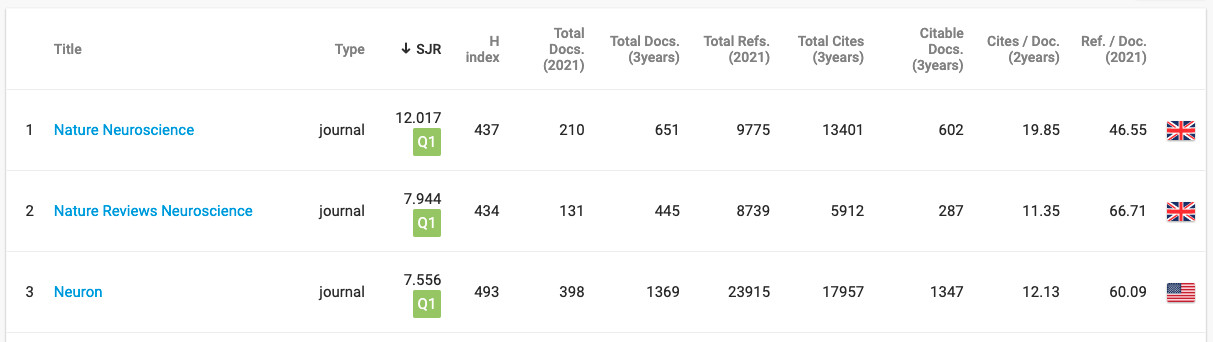 
 
- My biggest challenge was in that the API would only retreive 10 articles at a time. I tackled it by writing a function that would:
    - Take a list of the desired journals and API keys as input.
    - Retreive the result counts for each journal (aka length of the full archive).
    - Generate paginated links accordingly to be used for the retreival of their full archive 10 articles at a time.
    - Use randomised API keys from the input list with each URLs to avoid authorisation issues.
- To automate the data retreival from the collected JSONs, I have written functions that would loop through each JSON file, then through each article within each JSON, and collect all the needed variables into a dataframe.

## Metrics Retrieval

- Most APIs that provide article metrics data are for institutional use only. I tackled this by scraping the individual articles web pages straight from the two publisher’s websites: Springer and Nature. I did so by using the unique digital object identifiers within the URL requests.

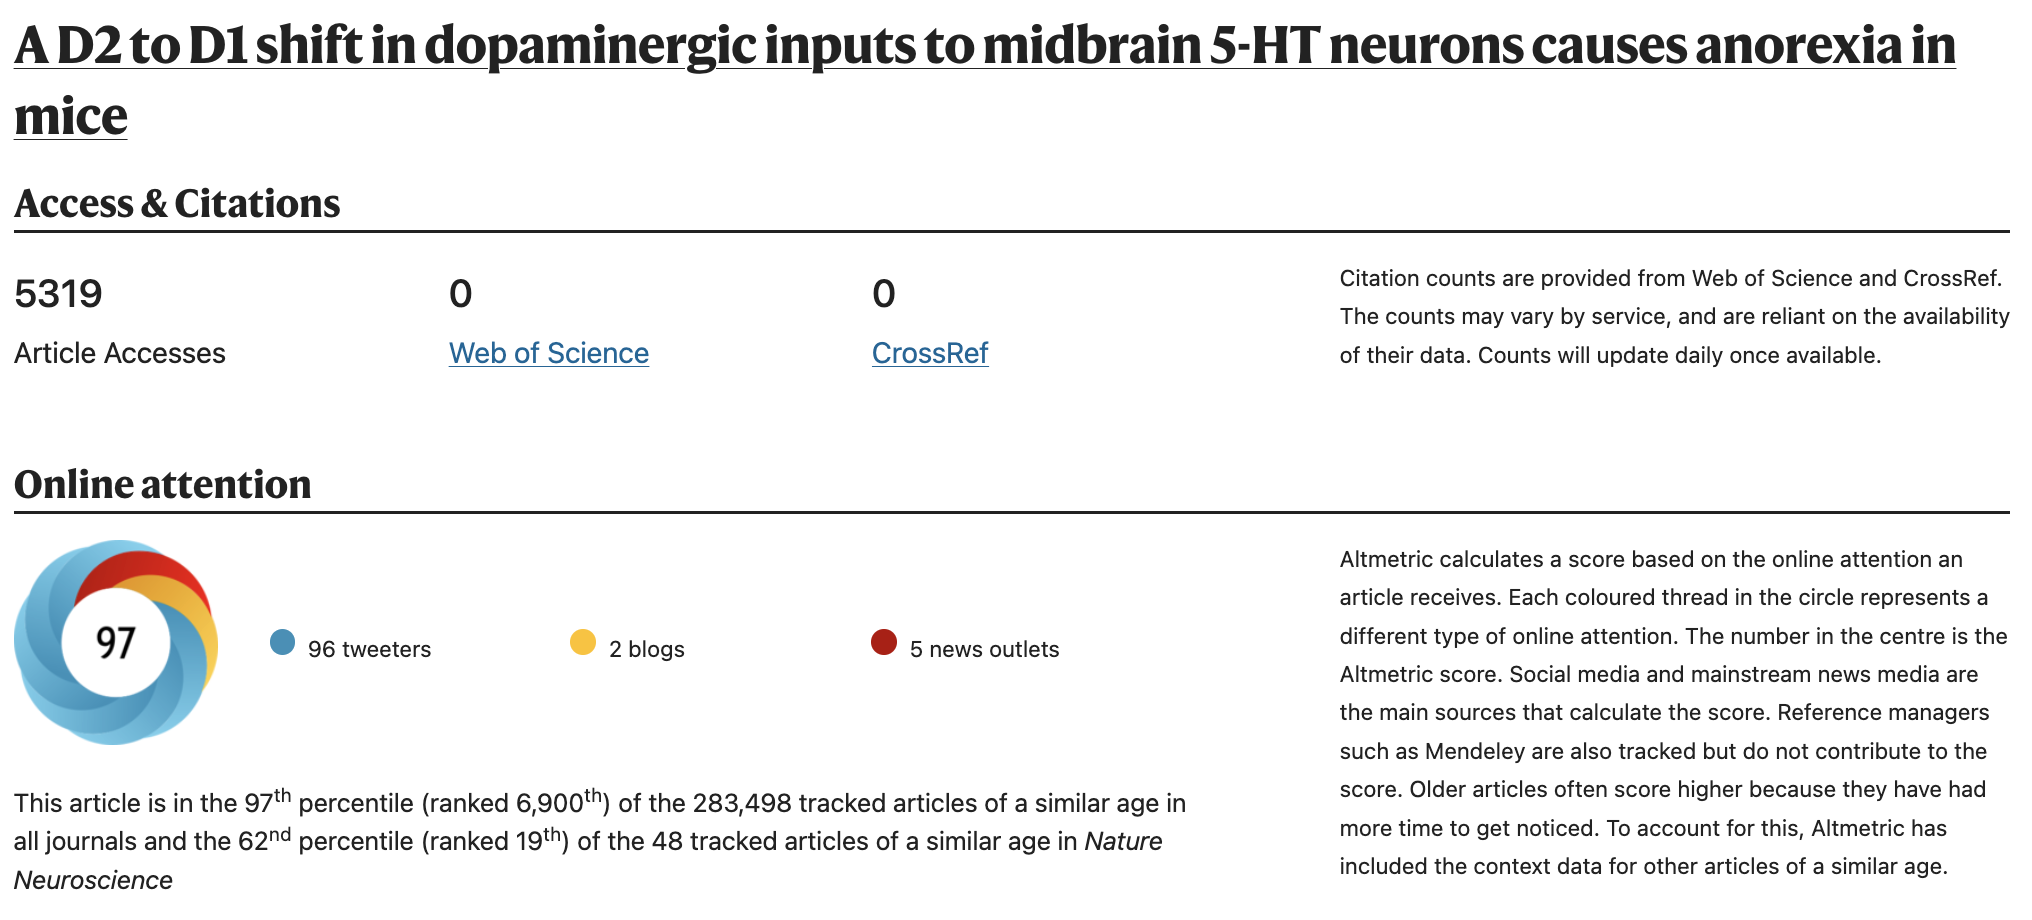

- One challenge I faced in this portion of the project was the variability in available metrics  between articles, for example, one could have had data on Twitter + Reddit, while another on Facebook + Blogs. Each of these would be contained within a separate “span” under varied HTML tags.
    - I tackled this issue by defining an "online attention" variable, which I requested for each article, then saved all of the available social media data within a single string. I'll then separated them into separate sources within the resulting Pandas dataframe.